# Restaurant rating prdiction using Yelp API

In [1]:
# imports that I added during the project
import pandas as pd 
import requests
import csv
from bs4 import BeautifulSoup
import json
import time
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Data acquisition- Yelp API

In [2]:
# Yelp API endpoint
url = "https://api.yelp.com/v3/businesses/search"

# Set your Yelp API key here
api_key = "ZD6mo9uhBu1r47JiATdVhe6sJs2_hPLki2IH6v9YzKpPLHqOMuebguyIn64ZmvvRqndrchjhh5iYCTaBtVYiZQv1ph8qBJoi-iW55MMLd9_4n3RhHpWFIklcpWlmZHYx"
businesses = []
# Parameters for the search
for city in ['NYC','San Francisco','Los Angeles']:
  for num in range(1,5):
    time.sleep(2)
    params = {
        "location": city,  # Example: Search businesses in San Francisco
        "limit": 19,  # Number of results per request
        "offset": 0 , # Starting offset for pagination
        "price": str(num)
    }

    # Number of businesses to retrieve
    desired_count =  len(businesses)+950
    while len(businesses) < desired_count:
        print(len(businesses))
        # Make a request to the Yelp API
        headers = {"Authorization": f"Bearer {api_key}"}
        response = requests.get(url, headers=headers, params=params)
        data = response.json()
        # print(data)
        # Extract business details from the response
        x = len(businesses)
        for business in data["businesses"]:
            print(business)
            transactions = business.get("transactions", [])
            delivery = 1 if "delivery" in transactions else 0
            pickup = 1 if "pickup" in transactions else 0       
            business_details = {
                "id":business["id"],
                "name": business["name"],
                "zipcode": business["location"]["zip_code"],
                "categories": ", ".join(category["title"] for category in business["categories"]),
                "pickup": pickup,
                "delivery": delivery,
                "price_range": business.get("price", ""),
                "rating": business.get("rating", "")
            }
            businesses.append(business_details)
            # print(businesses)  
        # Update the offset for the next request
        if  x == len(businesses):
            break
        params["offset"] += params["limit"]



0
{'id': 'zj8Lq1T8KIC5zwFief15jg', 'alias': 'prince-street-pizza-new-york-2', 'name': 'Prince Street Pizza', 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/PfI8oV4ct9ZJZNtUhSS8DQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/prince-street-pizza-new-york-2?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 4921, 'categories': [{'alias': 'pizza', 'title': 'Pizza'}, {'alias': 'italian', 'title': 'Italian'}], 'rating': 4.5, 'coordinates': {'latitude': 40.72308755605564, 'longitude': -73.99453001177575}, 'transactions': ['pickup', 'delivery'], 'price': '$', 'location': {'address1': '27 Prince St', 'address2': None, 'address3': '', 'city': 'New York', 'zip_code': '10012', 'country': 'US', 'state': 'NY', 'display_address': ['27 Prince St', 'New York, NY 10012']}, 'phone': '+12129664100', 'display_phone': '(212) 966-4100', 'distance': 2197.6339819772857}
{'id': 'j1S3NUrkB3BV

{'id': 'kNOr6_g6QfBHdhf89j3g5w', 'alias': 'taiwan-pork-chop-house-new-york', 'name': 'Taiwan Pork Chop House', 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/VmE9AvyeJXg8VKmPMbUPOw/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/taiwan-pork-chop-house-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 613, 'categories': [{'alias': 'taiwanese', 'title': 'Taiwanese'}, {'alias': 'chinese', 'title': 'Chinese'}, {'alias': 'noodles', 'title': 'Noodles'}], 'rating': 4.0, 'coordinates': {'latitude': 40.71429, 'longitude': -73.99798}, 'transactions': ['delivery'], 'price': '$', 'location': {'address1': '3 Doyers St', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10013', 'country': 'US', 'state': 'NY', 'display_address': ['3 Doyers St', 'New York, NY 10013']}, 'phone': '+12127917007', 'display_phone': '(212) 791-7007', 'distance': 1786.7475909669186}


{'id': 'nOCjslrdcKBQQYgD5qUs9Q', 'alias': 'kam-hing-coffee-shop-new-york-2', 'name': 'Kam Hing Coffee Shop', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/fZwPvEm-5Zfxdt6xBB9I2A/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/kam-hing-coffee-shop-new-york-2?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 855, 'categories': [{'alias': 'bakeries', 'title': 'Bakeries'}, {'alias': 'coffee', 'title': 'Coffee & Tea'}], 'rating': 4.5, 'coordinates': {'latitude': 40.71798, 'longitude': -73.99921}, 'transactions': [], 'price': '$', 'location': {'address1': '118 Baxter St', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10013', 'country': 'US', 'state': 'NY', 'display_address': ['118 Baxter St', 'New York, NY 10013']}, 'phone': '+16465527867', 'display_phone': '(646) 552-7867', 'distance': 2084.7778798254544}
{'id': 'L6DAp6L1ZJKeeDN2PwoOLQ', 'alias': 'adels

{'id': '4h4Tuuc56YPO6lWfZ1bdSQ', 'alias': 'joes-pizza-new-york-152', 'name': "Joe's Pizza", 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/dxFrYV5dwtAg0TAPs7CpEg/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/joes-pizza-new-york-152?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 471, 'categories': [{'alias': 'pizza', 'title': 'Pizza'}], 'rating': 4.0, 'coordinates': {'latitude': 40.7101297729083, 'longitude': -74.0077206864953}, 'transactions': ['pickup', 'delivery'], 'price': '$', 'location': {'address1': '124 Fulton St', 'address2': '', 'address3': None, 'city': 'New York', 'zip_code': '10038', 'country': 'US', 'state': 'NY', 'display_address': ['124 Fulton St', 'New York, NY 10038']}, 'phone': '+12122670860', 'display_phone': '(212) 267-0860', 'distance': 2448.5118272947116}
{'id': 's-n0KW8iqiq-C96tpxm2rA', 'alias': 'the-hairy-lemon-pub-new-york', 'name': 'The 

{'id': 'XA7phnS0fBfLR8xdsngiUQ', 'alias': 'gottscheer-hall-ridgewood', 'name': 'Gottscheer Hall', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/gOLNWBRYfJfwA_m5_WhgZQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/gottscheer-hall-ridgewood?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 58, 'categories': [{'alias': 'catering', 'title': 'Caterers'}, {'alias': 'german', 'title': 'German'}, {'alias': 'beerbar', 'title': 'Beer Bar'}], 'rating': 4.5, 'coordinates': {'latitude': 40.706891, 'longitude': -73.905479}, 'transactions': ['delivery'], 'price': '$', 'location': {'address1': '657 Fairview Ave', 'address2': '', 'address3': '', 'city': 'Ridgewood', 'zip_code': '11385', 'country': 'US', 'state': 'NY', 'display_address': ['657 Fairview Ave', 'Ridgewood, NY 11385']}, 'phone': '+17183663030', 'display_phone': '(718) 366-3030', 'distance': 6194.1547777834885}
{'id': 'B

{'id': 'Qmv4SPta2zx7MhKit8ywag', 'alias': 'absolute-coffee-brooklyn', 'name': 'Absolute Coffee', 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/_wfgUJ4SiZbcOz-yimhHhw/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/absolute-coffee-brooklyn?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 224, 'categories': [{'alias': 'coffee', 'title': 'Coffee & Tea'}, {'alias': 'bakeries', 'title': 'Bakeries'}, {'alias': 'sandwiches', 'title': 'Sandwiches'}], 'rating': 4.5, 'coordinates': {'latitude': 40.688205676769584, 'longitude': -73.98763887501784}, 'transactions': ['delivery', 'pickup'], 'price': '$', 'location': {'address1': '327 Atlantic Ave', 'address2': None, 'address3': '', 'city': 'Brooklyn', 'zip_code': '11201', 'country': 'US', 'state': 'NY', 'display_address': ['327 Atlantic Ave', 'Brooklyn, NY 11201']}, 'phone': '+17185220969', 'display_phone': '(718) 522-0969', 'dis

{'id': 'GRXvvB1OKMuW4XDWEaVAlg', 'alias': 'joes-pizza-brooklyn-8', 'name': "Joe's Pizza", 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/uf4DZxCD8qOSi6rjpTcTJQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/joes-pizza-brooklyn-8?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 443, 'categories': [{'alias': 'pizza', 'title': 'Pizza'}], 'rating': 4.0, 'coordinates': {'latitude': 40.7168952, 'longitude': -73.95892996733771}, 'transactions': ['pickup', 'delivery'], 'price': '$', 'location': {'address1': '216 Bedford Ave', 'address2': '', 'address3': None, 'city': 'Brooklyn', 'zip_code': '11249', 'country': 'US', 'state': 'NY', 'display_address': ['216 Bedford Ave', 'Brooklyn, NY 11249']}, 'phone': '+17183882216', 'display_phone': '(718) 388-2216', 'distance': 1996.8809289050694}
{'id': 'qzdCvtgpCDjNVV_zRJB5EQ', 'alias': 'voyager-espresso-new-york', 'name': 'Voyager Espr

{'id': 'atbANdSznV29GI066I2Ijw', 'alias': 'champion-pizza-new-york-6', 'name': 'Champion Pizza', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/SBZL50PVgk_0mYbo9_RsBQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/champion-pizza-new-york-6?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 421, 'categories': [{'alias': 'pizza', 'title': 'Pizza'}], 'rating': 4.5, 'coordinates': {'latitude': 40.7215270996094, 'longitude': -73.9970855712891}, 'transactions': ['delivery', 'pickup'], 'price': '$', 'location': {'address1': '17 Cleveland Pl', 'address2': None, 'address3': None, 'city': 'New York', 'zip_code': '10012', 'country': 'US', 'state': 'NY', 'display_address': ['17 Cleveland Pl', 'New York, NY 10012']}, 'phone': '+12122263777', 'display_phone': '(212) 226-3777', 'distance': 2200.525340620379}
{'id': 'PWFK0nvJ23Xkk_B4C5Q4Aw', 'alias': 'factory-tamal-new-york-4', 'name

{'id': 'K2d_jyiym-61tHTFeHrk2g', 'alias': 'ole-and-steen-new-york', 'name': 'Ole & Steen', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/KnYbNrEiq-4vcWlzmJAo4w/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/ole-and-steen-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 262, 'categories': [{'alias': 'bakeries', 'title': 'Bakeries'}, {'alias': 'coffee', 'title': 'Coffee & Tea'}, {'alias': 'sandwiches', 'title': 'Sandwiches'}], 'rating': 4.0, 'coordinates': {'latitude': 40.73806001359636, 'longitude': -73.99023000756564}, 'transactions': ['pickup', 'delivery'], 'price': '$', 'location': {'address1': '873 Broadway', 'address2': None, 'address3': '', 'city': 'New York', 'zip_code': '10003', 'country': 'US', 'state': 'NY', 'display_address': ['873 Broadway', 'New York, NY 10003']}, 'phone': '+19292091020', 'display_phone': '(929) 209-1020', 'distance': 3555.3205

{'id': 'nyxmTe-It-tzfagvjkge1g', 'alias': 'burrow-brooklyn', 'name': 'Burrow', 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/mebngCLJHN05G7fD7ATclw/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/burrow-brooklyn?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 86, 'categories': [{'alias': 'desserts', 'title': 'Desserts'}, {'alias': 'cakeshop', 'title': 'Patisserie/Cake Shop'}, {'alias': 'coffee', 'title': 'Coffee & Tea'}], 'rating': 4.5, 'coordinates': {'latitude': 40.7027771713273, 'longitude': -73.98680411986894}, 'transactions': ['delivery'], 'price': '$', 'location': {'address1': '68 Jay St', 'address2': 'Ste 119', 'address3': '', 'city': 'Brooklyn', 'zip_code': '11201', 'country': 'US', 'state': 'NY', 'display_address': ['68 Jay St', 'Ste 119', 'Brooklyn, NY 11201']}, 'phone': '', 'display_phone': '', 'distance': 830.501353931299}
{'id': 'qIOdughNii7-OW88IFtPQw

{'id': 'VGTrGSH38A4n-v5nFe4skA', 'alias': 'uncle-gussys-new-york', 'name': "Uncle Gussy's", 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/TSMm3ArhrT5YRsHRHP5DOg/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/uncle-gussys-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 479, 'categories': [{'alias': 'foodtrucks', 'title': 'Food Trucks'}, {'alias': 'greek', 'title': 'Greek'}], 'rating': 4.5, 'coordinates': {'latitude': 40.7576813278964, 'longitude': -73.9732953737526}, 'transactions': ['delivery', 'pickup'], 'price': '$', 'location': {'address1': '345 Park Ave', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10154', 'country': 'US', 'state': 'NY', 'display_address': ['345 Park Ave', 'New York, NY 10154']}, 'phone': '+19296001111', 'display_phone': '(929) 600-1111', 'distance': 5626.971394537147}
{'id': 'AfZPx4piTmg9dqZpYgYTgg', 'alias': 'mo

{'id': '6xCZHAr7yj_vWwRJalAEOg', 'alias': 'seed-mill-new-york', 'name': 'Seed + Mill', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/PPITbsJnw_mIVZdSHrOL5w/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/seed-mill-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 285, 'categories': [{'alias': 'desserts', 'title': 'Desserts'}, {'alias': 'icecream', 'title': 'Ice Cream & Frozen Yogurt'}, {'alias': 'gluten_free', 'title': 'Gluten-Free'}], 'rating': 4.5, 'coordinates': {'latitude': 40.7420723, 'longitude': -74.0056454}, 'transactions': ['delivery', 'pickup'], 'price': '$', 'location': {'address1': '409 W 15th St', 'address2': '', 'address3': 'Chelsea Market', 'city': 'New York', 'zip_code': '10011', 'country': 'US', 'state': 'NY', 'display_address': ['409 W 15th St', 'Chelsea Market', 'New York, NY 10011']}, 'phone': '', 'display_phone': '', 'distance': 4478.753

{'id': 'OMRkRHFXmS9txTWirA-yMA', 'alias': 'taheni-mediterranean-grill-brooklyn', 'name': 'Taheni Mediterranean Grill', 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/7lFILz_VP3wMMAmwClod-g/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/taheni-mediterranean-grill-brooklyn?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 268, 'categories': [{'alias': 'falafel', 'title': 'Falafel'}, {'alias': 'mideastern', 'title': 'Middle Eastern'}], 'rating': 4.0, 'coordinates': {'latitude': 40.67742, 'longitude': -73.98343}, 'transactions': ['pickup', 'delivery'], 'price': '$', 'location': {'address1': '224 4th Ave', 'address2': '', 'address3': None, 'city': 'Brooklyn', 'zip_code': '11215', 'country': 'US', 'state': 'NY', 'display_address': ['224 4th Ave', 'Brooklyn, NY 11215']}, 'phone': '+17185222083', 'display_phone': '(718) 522-2083', 'distance': 3341.307001242609}
{'id': '64i-2

{'id': '4qtJ_u-7-73ts5UPa6NBmA', 'alias': 'ni-japanese-delicacies-new-york', 'name': 'Ni Japanese Delicacies', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/DShcisbRF_aOfL65izQw9w/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/ni-japanese-delicacies-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 52, 'categories': [{'alias': 'japanese', 'title': 'Japanese'}, {'alias': 'delis', 'title': 'Delis'}, {'alias': 'gluten_free', 'title': 'Gluten-Free'}], 'rating': 4.5, 'coordinates': {'latitude': 40.71825456707942, 'longitude': -73.9881543}, 'transactions': ['pickup', 'delivery'], 'price': '$', 'location': {'address1': '88 Essex St', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10002', 'country': 'US', 'state': 'NY', 'display_address': ['88 Essex St', 'New York, NY 10002']}, 'phone': '+16466754324', 'display_phone': '(646) 675-4324', 'distance'

{'id': 'fzBvSgiIosXI_LY2xEFpFA', 'alias': 'physical-graffitea-new-york', 'name': 'Physical GraffiTea', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/GPvWLTChtqYv5iXkpDa44g/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/physical-graffitea-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 177, 'categories': [{'alias': 'coffee', 'title': 'Coffee & Tea'}, {'alias': 'tea', 'title': 'Tea Rooms'}, {'alias': 'cafes', 'title': 'Cafes'}], 'rating': 4.0, 'coordinates': {'latitude': 40.727188, 'longitude': -73.984927}, 'transactions': ['delivery', 'pickup'], 'price': '$', 'location': {'address1': '96 St Marks Pl', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10009', 'country': 'US', 'state': 'NY', 'display_address': ['96 St Marks Pl', 'New York, NY 10009']}, 'phone': '+12124777334', 'display_phone': '(212) 477-7334', 'distance': 2273.359410607037}
{

{'id': '68cim4K69TGznUL0RQMcpg', 'alias': 't-swirl-crepe-new-york-20', 'name': 'T-Swirl Crepe', 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/tkC7Q2ezQPLaaFiu30m81A/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/t-swirl-crepe-new-york-20?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 247, 'categories': [{'alias': 'desserts', 'title': 'Desserts'}, {'alias': 'gluten_free', 'title': 'Gluten-Free'}, {'alias': 'creperies', 'title': 'Creperies'}], 'rating': 4.5, 'coordinates': {'latitude': 40.71393, 'longitude': -73.9985899}, 'transactions': ['delivery', 'pickup'], 'price': '$', 'location': {'address1': '2 Mott St', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10013', 'country': 'US', 'state': 'NY', 'display_address': ['2 Mott St', 'New York, NY 10013']}, 'phone': '+12128849280', 'display_phone': '(212) 884-9280', 'distance': 1805.3574714835113}
{'i

{'id': 'CYYLEipRFmr73Hz6XNEzoQ', 'alias': 'little-italy-pizza-new-york-5', 'name': 'Little Italy Pizza', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/Oivp0ZIFFkS20riaDCnt0g/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/little-italy-pizza-new-york-5?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 602, 'categories': [{'alias': 'pizza', 'title': 'Pizza'}, {'alias': 'salad', 'title': 'Salad'}, {'alias': 'pastashops', 'title': 'Pasta Shops'}], 'rating': 4.0, 'coordinates': {'latitude': 40.756482, 'longitude': -73.981484}, 'transactions': ['pickup', 'delivery'], 'price': '$', 'location': {'address1': '55 W 45th St', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10036', 'country': 'US', 'state': 'NY', 'display_address': ['55 W 45th St', 'New York, NY 10036']}, 'phone': '+12127307575', 'display_phone': '(212) 730-7575', 'distance': 5477.8781690295455}

{'id': 'j_x5CbFjKfPcvakcWCE_hA', 'alias': 'kings-kolache-brooklyn', 'name': 'Kings Kolache', 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/XbqeB_RtrH5UsJYJg-AgYA/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/kings-kolache-brooklyn?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 41, 'categories': [{'alias': 'bakeries', 'title': 'Bakeries'}, {'alias': 'tex-mex', 'title': 'Tex-Mex'}, {'alias': 'coffee', 'title': 'Coffee & Tea'}], 'rating': 5.0, 'coordinates': {'latitude': 40.708076, 'longitude': -73.9205073}, 'transactions': ['pickup', 'delivery'], 'price': '$', 'location': {'address1': '321 Starr St', 'address2': '', 'address3': None, 'city': 'Brooklyn', 'zip_code': '11237', 'country': 'US', 'state': 'NY', 'display_address': ['321 Starr St', 'Brooklyn, NY 11237']}, 'phone': '+18456143226', 'display_phone': '(845) 614-3226', 'distance': 4924.521787312711}
{'id': 'w2

{'id': 'u9zVZH0liQu9skIz1kGrMA', 'alias': 'heavens-hot-bagel-new-york', 'name': "Heaven's Hot Bagel", 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/wTDyfoBGAs5i0_1JVn0sZw/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/heavens-hot-bagel-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 250, 'categories': [{'alias': 'bagels', 'title': 'Bagels'}, {'alias': 'delis', 'title': 'Delis'}, {'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'}], 'rating': 4.0, 'coordinates': {'latitude': 40.72131, 'longitude': -73.98436}, 'transactions': ['delivery'], 'price': '$', 'location': {'address1': '283 E Houston St', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10002', 'country': 'US', 'state': 'NY', 'display_address': ['283 E Houston St', 'New York, NY 10002']}, 'phone': '+12124207566', 'display_phone': '(212) 420-7566', 'distance': 1631.350833780

{'id': 'GcBZDgOKOP-RkH_mI-DS9A', 'alias': 'the-halal-guys-new-york-8', 'name': 'The Halal Guys', 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/N8f1uGM47SqfgDJU_aIUIQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/the-halal-guys-new-york-8?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 848, 'categories': [{'alias': 'mideastern', 'title': 'Middle Eastern'}, {'alias': 'halal', 'title': 'Halal'}, {'alias': 'mediterranean', 'title': 'Mediterranean'}], 'rating': 3.5, 'coordinates': {'latitude': 40.7323060751209, 'longitude': -73.9843906361069}, 'transactions': ['pickup', 'delivery'], 'price': '$', 'location': {'address1': '307 E 14th St', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10003', 'country': 'US', 'state': 'NY', 'display_address': ['307 E 14th St', 'New York, NY 10003']}, 'phone': '+13473784417', 'display_phone': '(347) 378-4417', 'distanc

{'id': 'BaTfJjz2DoJwOQz5eOrqNA', 'alias': 'mahmouds-corner-astoria', 'name': "Mahmoud's Corner", 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/PJcNMdAbVBAJjMsdONuwig/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/mahmouds-corner-astoria?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 212, 'categories': [{'alias': 'halal', 'title': 'Halal'}, {'alias': 'mideastern', 'title': 'Middle Eastern'}, {'alias': 'foodtrucks', 'title': 'Food Trucks'}], 'rating': 4.5, 'coordinates': {'latitude': 40.756975652065854, 'longitude': -73.92088932142887}, 'transactions': ['delivery', 'pickup'], 'price': '$', 'location': {'address1': '34th Ave and Steinway St', 'address2': '', 'address3': '', 'city': 'Astoria', 'zip_code': '11106', 'country': 'US', 'state': 'NY', 'display_address': ['34th Ave and Steinway St', 'Astoria, NY 11106']}, 'phone': '+19172952281', 'display_phone': '(917) 295

{'id': 'RHz7OAoy5yMNWBcLArgLrQ', 'alias': 'sweets-bakery-new-york', 'name': 'Sweets Bakery', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/QGtIohf6BmCB_1bMrSLTMQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/sweets-bakery-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 98, 'categories': [{'alias': 'bubbletea', 'title': 'Bubble Tea'}, {'alias': 'bakeries', 'title': 'Bakeries'}], 'rating': 4.0, 'coordinates': {'latitude': 40.717286, 'longitude': -73.9996625}, 'transactions': ['pickup', 'delivery'], 'price': '$', 'location': {'address1': '135 Walker St', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10013', 'country': 'US', 'state': 'NY', 'display_address': ['135 Walker St', 'New York, NY 10013']}, 'phone': '+12122192012', 'display_phone': '(212) 219-2012', 'distance': 2073.6806653637464}
{'id': '86d1dsvm9dyARtaAQmjfUg', 'alias': 'rudys-b

{'id': 'LfPtY7hYpOsNTaxgfny_hw', 'alias': 'madman-espresso-new-york-5', 'name': 'Madman Espresso', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/VACBjAtVKpOkCHA1x4iNRQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/madman-espresso-new-york-5?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 102, 'categories': [{'alias': 'coffee', 'title': 'Coffee & Tea'}], 'rating': 4.5, 'coordinates': {'latitude': 40.7326190878137, 'longitude': -73.9940478909803}, 'transactions': ['delivery', 'pickup'], 'price': '$', 'location': {'address1': '54 University Pl', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10003', 'country': 'US', 'state': 'NY', 'display_address': ['54 University Pl', 'New York, NY 10003']}, 'phone': '+13477811121', 'display_phone': '(347) 781-1121', 'distance': 3094.9612433584894}
{'id': 'R_9naRCabjpSnmiFPeXgrQ', 'alias': 'amys-bread-new-york-4'

{'id': 'KfPqpZb7dCRlgao5fQXrcA', 'alias': 'sugar-hill-creamery-new-york', 'name': 'Sugar Hill Creamery', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/94X7lE2gnwqlk6R0vIi72w/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/sugar-hill-creamery-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 275, 'categories': [{'alias': 'icecream', 'title': 'Ice Cream & Frozen Yogurt'}, {'alias': 'coffee', 'title': 'Coffee & Tea'}, {'alias': 'desserts', 'title': 'Desserts'}], 'rating': 4.5, 'coordinates': {'latitude': 40.80407, 'longitude': -73.94785}, 'transactions': ['delivery', 'pickup'], 'price': '$', 'location': {'address1': '184 Lenox Ave', 'address2': None, 'address3': '', 'city': 'New York', 'zip_code': '10026', 'country': 'US', 'state': 'NY', 'display_address': ['184 Lenox Ave', 'New York, NY 10026']}, 'phone': '+12126349004', 'display_phone': '(212) 634-9004', 'dis

{'id': 'yaBrQbt7kMrbXAo6qrzpYw', 'alias': 'by-the-way-bakery-new-york', 'name': 'By the Way Bakery', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/iioE0AdgUvuhNdogk04M6w/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/by-the-way-bakery-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 265, 'categories': [{'alias': 'bakeries', 'title': 'Bakeries'}, {'alias': 'gluten_free', 'title': 'Gluten-Free'}, {'alias': 'customcakes', 'title': 'Custom Cakes'}], 'rating': 4.5, 'coordinates': {'latitude': 40.7908056, 'longitude': -73.9740896}, 'transactions': ['delivery'], 'price': '$', 'location': {'address1': '2440 Broadway', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10024', 'country': 'US', 'state': 'NY', 'display_address': ['2440 Broadway', 'New York, NY 10024']}, 'phone': '+12128770806', 'display_phone': '(212) 877-0806', 'distance': 9299.1306622

{'id': 'mfK5xIUfIm8nnIL_KGb9Dg', 'alias': 'sanpanino-new-york', 'name': 'Sanpanino', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/xiOYJJ9ZcveEN5Q3nDTLGw/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/sanpanino-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 186, 'categories': [{'alias': 'sandwiches', 'title': 'Sandwiches'}, {'alias': 'coffee', 'title': 'Coffee & Tea'}], 'rating': 4.0, 'coordinates': {'latitude': 40.73281, 'longitude': -74.00613}, 'transactions': ['pickup', 'delivery'], 'price': '$', 'location': {'address1': '494 Hudson St', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10014', 'country': 'US', 'state': 'NY', 'display_address': ['494 Hudson St', 'New York, NY 10014']}, 'phone': '+12126457228', 'display_phone': '(212) 645-7228', 'distance': 3656.379688111708}
{'id': '9MWmRzKbw6-OR8O1fYa2fw', 'alias': 'tacos-el-bronco-bro

{'id': 'NAKyofVbdyf5msnrLVchYg', 'alias': 'bittersweet-brooklyn', 'name': 'Bittersweet', 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/gDZ53Vyw2ZCqgnn6GbBWnA/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/bittersweet-brooklyn?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 150, 'categories': [{'alias': 'coffee', 'title': 'Coffee & Tea'}, {'alias': 'donuts', 'title': 'Donuts'}, {'alias': 'cafes', 'title': 'Cafes'}], 'rating': 4.0, 'coordinates': {'latitude': 40.689498, 'longitude': -73.9725219}, 'transactions': ['delivery'], 'price': '$', 'location': {'address1': '180 Dekalb Ave', 'address2': '', 'address3': '', 'city': 'Brooklyn', 'zip_code': '11205', 'country': 'US', 'state': 'NY', 'display_address': ['180 Dekalb Ave', 'Brooklyn, NY 11205']}, 'phone': '+17188522556', 'display_phone': '(718) 852-2556', 'distance': 2047.001217064366}
{'id': 'eW7kDF_1PT0CBbKA0sjLfA'

{'id': '43mQbsfP4ZiCN0z8SM475Q', 'alias': 'cafe-talya-bayonne', 'name': 'Cafe Talya', 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/ZNjWOo-cLNI19HjcCewM1w/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/cafe-talya-bayonne?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 291, 'categories': [{'alias': 'cafes', 'title': 'Cafes'}, {'alias': 'mediterranean', 'title': 'Mediterranean'}, {'alias': 'tradamerican', 'title': 'American (Traditional)'}], 'rating': 5.0, 'coordinates': {'latitude': 40.6844885741496, 'longitude': -74.1073497064864}, 'transactions': ['delivery', 'pickup'], 'price': '$', 'location': {'address1': '218 Ave B', 'address2': '', 'address3': '', 'city': 'Bayonne', 'zip_code': '07002', 'country': 'US', 'state': 'NJ', 'display_address': ['218 Ave B', 'Bayonne, NJ 07002']}, 'phone': '+12015355333', 'display_phone': '(201) 535-5333', 'distance': 11119.39373992

{'id': 'wGcquMur1HYWhc4baXB27A', 'alias': 'juicy-lucy-juice-bar-new-york', 'name': 'Juicy Lucy Juice Bar', 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/yDWK5ACFUPoTQKU-U1Sl6w/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/juicy-lucy-juice-bar-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 131, 'categories': [{'alias': 'coffee', 'title': 'Coffee & Tea'}, {'alias': 'juicebars', 'title': 'Juice Bars & Smoothies'}, {'alias': 'vegan', 'title': 'Vegan'}], 'rating': 4.0, 'coordinates': {'latitude': 40.725266815162904, 'longitude': -73.98443887467434}, 'transactions': ['delivery'], 'price': '$', 'location': {'address1': '85 Ave A', 'address2': None, 'address3': '', 'city': 'New York', 'zip_code': '10009', 'country': 'US', 'state': 'NY', 'display_address': ['85 Ave A', 'New York, NY 10009']}, 'phone': '+12127775829', 'display_phone': '(212) 777-5829', 'distance'

{'id': 'VrcskEyfQixzu43Mzu60cQ', 'alias': 'nomad-cafe-and-eatery-ridgewood', 'name': 'Nomad Cafe & Eatery', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/fwDuscnVgDthsLhC7NDWng/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/nomad-cafe-and-eatery-ridgewood?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 44, 'categories': [{'alias': 'cafes', 'title': 'Cafes'}], 'rating': 5.0, 'coordinates': {'latitude': 40.70404, 'longitude': -73.90188}, 'transactions': ['delivery'], 'price': '$', 'location': {'address1': '67-14 Forest Ave', 'address2': '', 'address3': None, 'city': 'Ridgewood', 'zip_code': '11385', 'country': 'US', 'state': 'NY', 'display_address': ['67-14 Forest Ave', 'Ridgewood, NY 11385']}, 'phone': '+13472278136', 'display_phone': '(347) 227-8136', 'distance': 6497.758226601778}
{'id': 'IIcKE40roY_GYSMS7Io4Nw', 'alias': 'bushwick-country-club-brooklyn', 'name':

{'id': '40Zhd8HA_8WuIu1ZcyfwBQ', 'alias': 'breads-bakery-new-york-13', 'name': 'Breads Bakery', 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/Q-83oJjVVxeQkEgBydZiqA/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/breads-bakery-new-york-13?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 92, 'categories': [{'alias': 'bakeries', 'title': 'Bakeries'}, {'alias': 'coffee', 'title': 'Coffee & Tea'}, {'alias': 'sandwiches', 'title': 'Sandwiches'}], 'rating': 4.5, 'coordinates': {'latitude': 40.75370962396801, 'longitude': -73.98452457942003}, 'transactions': ['delivery', 'pickup'], 'price': '$', 'location': {'address1': '1080 1090 6th Ave', 'address2': '', 'address3': 'Bryant Park', 'city': 'New York', 'zip_code': '10036', 'country': 'US', 'state': 'NY', 'display_address': ['1080 1090 6th Ave', 'Bryant Park', 'New York, NY 10036']}, 'phone': '+12126332253', 'display_phone'

{'id': 'd1BU81f_yEqUfFjKMNQjsw', 'alias': 'bwè-kafe-jersey-city', 'name': 'bwè kafe', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/l7w5B5LVsHWX307yHuvYUw/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/bw%C3%A8-kafe-jersey-city?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 165, 'categories': [{'alias': 'cafes', 'title': 'Cafes'}, {'alias': 'coffee', 'title': 'Coffee & Tea'}], 'rating': 4.5, 'coordinates': {'latitude': 40.7307073, 'longitude': -74.0316501}, 'transactions': ['delivery', 'pickup'], 'price': '$', 'location': {'address1': '140 River Dr S', 'address2': None, 'address3': '', 'city': 'Jersey City', 'zip_code': '07310', 'country': 'US', 'state': 'NJ', 'display_address': ['140 River Dr S', 'Jersey City, NJ 07310']}, 'phone': '+12019630333', 'display_phone': '(201) 963-0333', 'distance': 5156.418214131011}
{'id': 'DnvW3-wKaY1foT1uBz-aIg', 'alias': 'tortas-

{'id': '0mjfhvQArDoqKTg3ONWbmQ', 'alias': 'king-of-falafel-and-shawarma-cart-new-york', 'name': 'King of Falafel & Shawarma - Cart', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/D91fQqBPucRRRL3Bf4yWFQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/king-of-falafel-and-shawarma-cart-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 181, 'categories': [{'alias': 'falafel', 'title': 'Falafel'}, {'alias': 'foodstands', 'title': 'Food Stands'}], 'rating': 4.5, 'coordinates': {'latitude': 40.7592340480098, 'longitude': -73.972864948706}, 'transactions': ['pickup', 'delivery'], 'price': '$', 'location': {'address1': '53rd & Park Ave', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10022', 'country': 'US', 'state': 'NY', 'display_address': ['53rd & Park Ave', 'New York, NY 10022']}, 'phone': '+17188384413', 'display_phone': '(718) 838-4413', 'dist

{'id': 'wmDx6a6HPvlq5lX3wH52EA', 'alias': 'saint-vitus-brooklyn', 'name': 'Saint Vitus', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/SFtGBr3e8J_vehsto02fGw/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/saint-vitus-brooklyn?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 158, 'categories': [{'alias': 'bars', 'title': 'Bars'}, {'alias': 'musicvenues', 'title': 'Music Venues'}], 'rating': 4.0, 'coordinates': {'latitude': 40.73678, 'longitude': -73.95517}, 'transactions': [], 'price': '$', 'location': {'address1': '1120 Manhattan Ave', 'address2': '', 'address3': '', 'city': 'Brooklyn', 'zip_code': '11222', 'country': 'US', 'state': 'NY', 'display_address': ['1120 Manhattan Ave', 'Brooklyn, NY 11222']}, 'phone': '', 'display_phone': '', 'distance': 3846.7534819672373}
{'id': 'Fx_zqaXVgc8BzwIfcbEKkw', 'alias': 'bos-bagels-new-york', 'name': "BO's Bagels", 'image_url

{'id': 'djQCSwY5ElZYxFqTZYoDww', 'alias': 'alfalfa-hoboken-3', 'name': 'Alfalfa', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/Bq4QUeYcSlyIJ8p49rkYIg/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/alfalfa-hoboken-3?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 180, 'categories': [{'alias': 'salad', 'title': 'Salad'}, {'alias': 'coffee', 'title': 'Coffee & Tea'}, {'alias': 'donuts', 'title': 'Donuts'}], 'rating': 4.5, 'coordinates': {'latitude': 40.75048, 'longitude': -74.02725}, 'transactions': ['pickup', 'delivery'], 'price': '$', 'location': {'address1': '1110 Washington St', 'address2': None, 'address3': '', 'city': 'Hoboken', 'zip_code': '07030', 'country': 'US', 'state': 'NJ', 'display_address': ['1110 Washington St', 'Hoboken, NJ 07030']}, 'phone': '+12017900491', 'display_phone': '(201) 790-0491', 'distance': 6299.724094105976}
{'id': 'tS4aiWBYgzlqKX898j

{'id': 'h0ulrkowIQipwT0K--LMaA', 'alias': 'gian-piero-bakery-astoria', 'name': 'Gian Piero Bakery', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/VSZnJv7qZo-mIbXXYiy2sw/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/gian-piero-bakery-astoria?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 191, 'categories': [{'alias': 'bakeries', 'title': 'Bakeries'}], 'rating': 4.5, 'coordinates': {'latitude': 40.76229, 'longitude': -73.91103}, 'transactions': ['delivery'], 'price': '$', 'location': {'address1': '4417 30th Ave', 'address2': '', 'address3': '', 'city': 'Astoria', 'zip_code': '11103', 'country': 'US', 'state': 'NY', 'display_address': ['4417 30th Ave', 'Astoria, NY 11103']}, 'phone': '+17182748959', 'display_phone': '(718) 274-8959', 'distance': 8370.835609066922}
{'id': 'Nqclrw9CkHpSSr1Yvmg7Gg', 'alias': 'lucky-new-york', 'name': 'Lucky', 'image_url': 'https://s3-

{'id': 'MGBFibk55nVIGsIV5zZtkw', 'alias': 'previti-pizza-new-york', 'name': 'Previti Pizza', 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/boF3ZKdMUmMlsARuoIVQow/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/previti-pizza-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 448, 'categories': [{'alias': 'pizza', 'title': 'Pizza'}, {'alias': 'beerbar', 'title': 'Beer Bar'}, {'alias': 'sandwiches', 'title': 'Sandwiches'}], 'rating': 4.0, 'coordinates': {'latitude': 40.7509380299598, 'longitude': -73.9767879766344}, 'transactions': ['pickup', 'delivery'], 'price': '$', 'location': {'address1': '123 E 41st St', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10168', 'country': 'US', 'state': 'NY', 'display_address': ['123 E 41st St', 'New York, NY 10168']}, 'phone': '+12125574992', 'display_phone': '(212) 557-4992', 'distance': 4860.478365263554}

{'id': 'OPOmqhGguJY8W5LyenzQAQ', 'alias': 'vivi-bubble-tea-new-york-10', 'name': 'ViVi Bubble Tea', 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/6yyi8UZuZh8Ut3UclMPpmg/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/vivi-bubble-tea-new-york-10?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 153, 'categories': [{'alias': 'taiwanese', 'title': 'Taiwanese'}, {'alias': 'bubbletea', 'title': 'Bubble Tea'}, {'alias': 'coffee', 'title': 'Coffee & Tea'}], 'rating': 3.5, 'coordinates': {'latitude': 40.732567, 'longitude': -73.986229}, 'transactions': ['pickup', 'delivery'], 'price': '$', 'location': {'address1': '226 E 14th St', 'address2': None, 'address3': '', 'city': 'New York', 'zip_code': '10003', 'country': 'US', 'state': 'NY', 'display_address': ['226 E 14th St', 'New York, NY 10003']}, 'phone': '+12127778988', 'display_phone': '(212) 777-8988', 'distance': 2885.831

{'id': 'tD2l7pW7DxiyDPLlZ9URcA', 'alias': 'breads-bakery-new-york-15', 'name': 'Breads Bakery', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/uKDp3hr7ueZgWrgaaOePLQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/breads-bakery-new-york-15?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 52, 'categories': [{'alias': 'bakeries', 'title': 'Bakeries'}, {'alias': 'desserts', 'title': 'Desserts'}, {'alias': 'cafes', 'title': 'Cafes'}], 'rating': 4.0, 'coordinates': {'latitude': 40.77151, 'longitude': -73.95951}, 'transactions': ['delivery', 'pickup'], 'price': '$', 'location': {'address1': '1294 3rd Ave', 'address2': None, 'address3': None, 'city': 'New York', 'zip_code': '10021', 'country': 'US', 'state': 'NY', 'display_address': ['1294 3rd Ave', 'New York, NY 10021']}, 'phone': '+12126332253', 'display_phone': '(212) 633-2253', 'distance': 7307.059725504316}
{'id': 'B73

{'id': 'Rr55bXbJcfdm4lIf-1f0Qw', 'alias': 'kwik-meal-new-york-2', 'name': 'Kwik Meal', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/A8T4vZkIQ9BBO_UCdT9D2Q/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/kwik-meal-new-york-2?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 295, 'categories': [{'alias': 'streetvendors', 'title': 'Street Vendors'}, {'alias': 'halal', 'title': 'Halal'}, {'alias': 'mediterranean', 'title': 'Mediterranean'}], 'rating': 4.0, 'coordinates': {'latitude': 40.7567014, 'longitude': -73.9828935}, 'transactions': ['delivery', 'pickup'], 'price': '$', 'location': {'address1': '100 W 45th St', 'address2': None, 'address3': '', 'city': 'New York', 'zip_code': '10036', 'country': 'US', 'state': 'NY', 'display_address': ['100 W 45th St', 'New York, NY 10036']}, 'phone': '+19174124694', 'display_phone': '(917) 412-4694', 'distance': 5518.73512797357}


{'id': 'QUf4eik0ipJGkBtRHNMl5g', 'alias': 'zuckers-bagels-and-smoked-fish-new-york-13', 'name': 'Zuckers Bagels And Smoked Fish', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/RPNx-FMw0gV-rtfPoCkg4Q/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/zuckers-bagels-and-smoked-fish-new-york-13?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 900, 'categories': [{'alias': 'bagels', 'title': 'Bagels'}, {'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'}, {'alias': 'delis', 'title': 'Delis'}], 'rating': 3.5, 'coordinates': {'latitude': 40.744758, 'longitude': -73.998535}, 'transactions': ['pickup', 'delivery'], 'price': '$', 'location': {'address1': '242 8th Ave', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10011', 'country': 'US', 'state': 'NY', 'display_address': ['242 8th Ave', 'New York, NY 10011']}, 'phone': '+16466381335', 'display_phone'

{'id': 'cgWxj5zytsVQtbygN9M-OQ', 'alias': 'charlotte-patisserie-brooklyn-2', 'name': 'Charlotte Patisserie', 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/l0ew6O0DMbQ4KBUAC8H8UA/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/charlotte-patisserie-brooklyn-2?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 61, 'categories': [{'alias': 'cakeshop', 'title': 'Patisserie/Cake Shop'}, {'alias': 'coffee', 'title': 'Coffee & Tea'}, {'alias': 'customcakes', 'title': 'Custom Cakes'}], 'rating': 4.0, 'coordinates': {'latitude': 40.6872171402548, 'longitude': -73.9933373406529}, 'transactions': ['delivery'], 'price': '$', 'location': {'address1': '201 Court St', 'address2': '', 'address3': None, 'city': 'Brooklyn', 'zip_code': '11201', 'country': 'US', 'state': 'NY', 'display_address': ['201 Court St', 'Brooklyn, NY 11201']}, 'phone': '+19292950372', 'display_phone': '(929) 295

{'id': 'QjgcZ3n9zrFYN4MLVOetJw', 'alias': 'the-cobra-club-bushwick', 'name': 'The Cobra Club', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/mT1XSKSaI6CJOWzT4RLybg/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/the-cobra-club-bushwick?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 140, 'categories': [{'alias': 'cafes', 'title': 'Cafes'}, {'alias': 'yoga', 'title': 'Yoga'}, {'alias': 'bars', 'title': 'Bars'}], 'rating': 4.0, 'coordinates': {'latitude': 40.706684, 'longitude': -73.923492}, 'transactions': ['delivery'], 'price': '$', 'location': {'address1': '6 Wyckoff Ave', 'address2': '', 'address3': '', 'city': 'Bushwick', 'zip_code': '11237', 'country': 'US', 'state': 'NY', 'display_address': ['6 Wyckoff Ave', 'Bushwick, NY 11237']}, 'phone': '+19177191138', 'display_phone': '(917) 719-1138', 'distance': 4670.759826176437}
{'id': 'MP312n6B0iEeHWlyaqkPSw', 'alias

{'id': 'gNuIdQMEddQUHUTiFXxZGg', 'alias': 'brownstone-bagel-and-bread-brooklyn', 'name': 'Brownstone Bagel & Bread', 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/OHLsYnpvKHTta3yn-V3nog/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/brownstone-bagel-and-bread-brooklyn?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 256, 'categories': [{'alias': 'bagels', 'title': 'Bagels'}, {'alias': 'coffee', 'title': 'Coffee & Tea'}, {'alias': 'sandwiches', 'title': 'Sandwiches'}], 'rating': 3.5, 'coordinates': {'latitude': 40.67744, 'longitude': -73.98274}, 'transactions': ['delivery', 'pickup'], 'price': '$', 'location': {'address1': '671 Union St', 'address2': '', 'address3': '', 'city': 'Brooklyn', 'zip_code': '11215', 'country': 'US', 'state': 'NY', 'display_address': ['671 Union St', 'Brooklyn, NY 11215']}, 'phone': '+17186226030', 'display_phone': '(718) 622-6030', 'dista

{'id': 'YnwqRRChuaWpXOBHQKrmzg', 'alias': 'green-and-ackerman-bakery-brooklyn', 'name': 'Green & Ackerman Bakery', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/v4rmosiKwzoAT6MzuoNA9w/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/green-and-ackerman-bakery-brooklyn?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 21, 'categories': [{'alias': 'bakeries', 'title': 'Bakeries'}], 'rating': 4.5, 'coordinates': {'latitude': 40.6971359, 'longitude': -73.9583664}, 'transactions': ['delivery', 'pickup'], 'price': '$', 'location': {'address1': '65 Franklin Ave', 'address2': '', 'address3': '', 'city': 'Brooklyn', 'zip_code': '11205', 'country': 'US', 'state': 'NY', 'display_address': ['65 Franklin Ave', 'Brooklyn, NY 11205']}, 'phone': '+17186250289', 'display_phone': '(718) 625-0289', 'distance': 2066.7609736724685}
{'id': 'iQTPjiskoE0jfHsoBSR1Jw', 'alias': 'roccos-italian-

{'id': 'u0J9njc0AJa69Q28m2P5Ww', 'alias': 'golden-eggies-new-york', 'name': 'Golden Eggies', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/Xp7UtirYvemoZBF6iONEYg/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/golden-eggies-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 25, 'categories': [{'alias': 'waffles', 'title': 'Waffles'}, {'alias': 'foodstands', 'title': 'Food Stands'}], 'rating': 5.0, 'coordinates': {'latitude': 40.723545, 'longitude': -73.985601}, 'transactions': [], 'price': '$', 'location': {'address1': '39 Ave A', 'address2': None, 'address3': '', 'city': 'New York', 'zip_code': '11354', 'country': 'US', 'state': 'NY', 'display_address': ['39 Ave A', 'New York, NY 11354']}, 'phone': '+16463873684', 'display_phone': '(646) 387-3684', 'distance': 1896.6976042821761}
{'id': 'PevQg80JGAhgMf0BKWsa_A', 'alias': 'java-girl-new-york', 'name': 'Java G

{'id': 'yqU1-chsjix3T4EMY2MyxA', 'alias': 'athens-grill-and-sports-bar-astoria', 'name': 'Athens Grill & Sports Bar', 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/VWk0D3GU0kkFUd1d_yPNHg/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/athens-grill-and-sports-bar-astoria?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 218, 'categories': [{'alias': 'mexican', 'title': 'Mexican'}, {'alias': 'sportsbars', 'title': 'Sports Bars'}], 'rating': 4.0, 'coordinates': {'latitude': 40.76734, 'longitude': -73.92178}, 'transactions': ['delivery'], 'price': '$', 'location': {'address1': '3011 30th Ave', 'address2': '', 'address3': '', 'city': 'Astoria', 'zip_code': '11102', 'country': 'US', 'state': 'NY', 'display_address': ['3011 30th Ave', 'Astoria, NY 11102']}, 'phone': '+17187775366', 'display_phone': '(718) 777-5366', 'distance': 8234.595483464953}
{'id': 'Rs_ZjBLqWjGNEAPNnff

{'id': 'ryeLGqN2ph8bPkgYuyIVtA', 'alias': 'antepli-baklava-brooklyn', 'name': 'Antepli Baklava', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/4t8N325hRsrKZb7ISfxgyQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/antepli-baklava-brooklyn?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 78, 'categories': [{'alias': 'desserts', 'title': 'Desserts'}, {'alias': 'bakeries', 'title': 'Bakeries'}, {'alias': 'icecream', 'title': 'Ice Cream & Frozen Yogurt'}], 'rating': 4.5, 'coordinates': {'latitude': 40.63132, 'longitude': -74.02206}, 'transactions': ['delivery', 'pickup'], 'price': '$', 'location': {'address1': '7216 5th Ave', 'address2': None, 'address3': '', 'city': 'Brooklyn', 'zip_code': '11209', 'country': 'US', 'state': 'NY', 'display_address': ['7216 5th Ave', 'Brooklyn, NY 11209']}, 'phone': '+17187450777', 'display_phone': '(718) 745-0777', 'distance': 9192.1234

{'id': 'nXh79laNQ7leN92F5Ore-Q', 'alias': 'forever-taste-new-york', 'name': 'Forever Taste', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/ovt1wc0fuMFoMuv2KlA6Dg/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/forever-taste-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 54, 'categories': [{'alias': 'chinese', 'title': 'Chinese'}], 'rating': 4.0, 'coordinates': {'latitude': 40.71293, 'longitude': -73.98994}, 'transactions': ['delivery'], 'price': '$', 'location': {'address1': '27 Rutgers St', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10002', 'country': 'US', 'state': 'NY', 'display_address': ['27 Rutgers St', 'New York, NY 10002']}, 'phone': '+16462888434', 'display_phone': '(646) 288-8434', 'distance': 1129.564717563522}
{'id': '_OhStiscqJvgZ7orFBACmA', 'alias': 'bushwick-bakery-brooklyn', 'name': 'Bushwick Bakery', 'image_url': 'ht

{'id': 'jihIaG10elZ3MFPFnDa-kA', 'alias': 'happy-star-bakery-corp-new-york', 'name': 'Happy Star Bakery Corp', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/0sz08u1v6hbSjHORtofy1w/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/happy-star-bakery-corp-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 56, 'categories': [{'alias': 'bakeries', 'title': 'Bakeries'}, {'alias': 'noodles', 'title': 'Noodles'}, {'alias': 'soup', 'title': 'Soup'}], 'rating': 3.5, 'coordinates': {'latitude': 40.71418, 'longitude': -73.9905}, 'transactions': [], 'price': '$', 'location': {'address1': '160 E Broadway', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10002', 'country': 'US', 'state': 'NY', 'display_address': ['160 E Broadway', 'New York, NY 10002']}, 'phone': '+12126088899', 'display_phone': '(212) 608-8899', 'distance': 1243.491258926369}
{'id': '096LKIm

950
{'id': 'VvsZAnEwU4c8Xkyrzx05Nw', 'alias': 'anytime-kitchen-new-york-2', 'name': 'Anytime Kitchen ', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/qXbHL3jcCR0G0ivt-MEYhw/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/anytime-kitchen-new-york-2?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 2608, 'categories': [{'alias': 'korean', 'title': 'Korean'}, {'alias': 'tapasmallplates', 'title': 'Tapas/Small Plates'}, {'alias': 'bbq', 'title': 'Barbeque'}], 'rating': 4.5, 'coordinates': {'latitude': 40.74776270790539, 'longitude': -73.9867793576711}, 'transactions': ['restaurant_reservation', 'delivery', 'pickup'], 'price': '$$', 'location': {'address1': '23 W 32nd St', 'address2': 'Fl 3', 'address3': '', 'city': 'New York', 'zip_code': '10001', 'country': 'US', 'state': 'NY', 'display_address': ['23 W 32nd St', 'Fl 3', 'New York, NY 10001']}, 'phone': '+16466697733', 

{'id': '44SY464xDHbvOcjDzRbKkQ', 'alias': 'ippudo-ny-new-york-7', 'name': 'Ippudo NY', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/zF3EgqHCk7zBUwD2B3WTEA/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/ippudo-ny-new-york-7?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 10611, 'categories': [{'alias': 'ramen', 'title': 'Ramen'}], 'rating': 4.0, 'coordinates': {'latitude': 40.73092, 'longitude': -73.99015}, 'transactions': ['pickup', 'delivery'], 'price': '$$', 'location': {'address1': '65 4th Ave', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10003', 'country': 'US', 'state': 'NY', 'display_address': ['65 4th Ave', 'New York, NY 10003']}, 'phone': '+12123880088', 'display_phone': '(212) 388-0088', 'distance': 2799.0612585668937}
{'id': 'H4jJ7XB3CetIr1pg56CczQ', 'alias': 'levain-bakery-new-york-new-york-2', 'name': 'Levain Bakery - New York', '

{'id': 'Me4TxTbPPQZQopW1wOGx5g', 'alias': 'jacks-wife-freda-new-york', 'name': "Jack's Wife Freda", 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/Mo4sHJ9wi76R2Eg3Q7bSqA/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/jacks-wife-freda-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 2362, 'categories': [{'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'}, {'alias': 'mediterranean', 'title': 'Mediterranean'}, {'alias': 'newamerican', 'title': 'American (New)'}], 'rating': 4.0, 'coordinates': {'latitude': 40.7221323, 'longitude': -73.9975402}, 'transactions': ['delivery'], 'price': '$$', 'location': {'address1': '226 Lafayette St', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10012', 'country': 'US', 'state': 'NY', 'display_address': ['226 Lafayette St', 'New York, NY 10012']}, 'phone': '+12125108550', 'display_phone': '(212) 510-8

{'id': 'VLGmFHE4s0Sfu0piMVQa1Q', 'alias': 'hold-fast-kitchen-and-spirits-new-york', 'name': 'Hold Fast Kitchen & Spirits', 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/2a8BP3w4_pgEn8Y0E6TBow/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/hold-fast-kitchen-and-spirits-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 592, 'categories': [{'alias': 'newamerican', 'title': 'American (New)'}, {'alias': 'cocktailbars', 'title': 'Cocktail Bars'}, {'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'}], 'rating': 4.5, 'coordinates': {'latitude': 40.76064, 'longitude': -73.99023}, 'transactions': ['delivery', 'pickup'], 'price': '$$', 'location': {'address1': '364 W 46th St', 'address2': None, 'address3': '', 'city': 'New York', 'zip_code': '10036', 'country': 'US', 'state': 'NY', 'display_address': ['364 W 46th St', 'New York, NY 10036']}, 'phone': '+1917261

{'id': 'cTE0e96GYzet799EJeStoQ', 'alias': 'chama-mama-new-york', 'name': 'Chama Mama', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/Fg6_8iy69sydoZr770bRLg/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/chama-mama-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 664, 'categories': [{'alias': 'georgian', 'title': 'Georgian'}, {'alias': 'wine_bars', 'title': 'Wine Bars'}, {'alias': 'cocktailbars', 'title': 'Cocktail Bars'}], 'rating': 4.5, 'coordinates': {'latitude': 40.7384, 'longitude': -73.99892}, 'transactions': ['pickup', 'delivery'], 'price': '$$', 'location': {'address1': '149 W 14th St', 'address2': None, 'address3': '', 'city': 'New York', 'zip_code': '10011', 'country': 'US', 'state': 'NY', 'display_address': ['149 W 14th St', 'New York, NY 10011']}, 'phone': '+16464389007', 'display_phone': '(646) 438-9007', 'distance': 3854.6827276150966}
{'id': 

{'id': 'WIhm0W9197f_rRtDziq5qQ', 'alias': 'lombardis-pizza-new-york-4', 'name': "Lombardi's Pizza", 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/m_9TT6hSasEMQKjvImPZGw/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/lombardis-pizza-new-york-4?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 6571, 'categories': [{'alias': 'pizza', 'title': 'Pizza'}], 'rating': 4.0, 'coordinates': {'latitude': 40.7215934960083, 'longitude': -73.9955956044561}, 'transactions': ['delivery', 'pickup'], 'price': '$$', 'location': {'address1': '32 Spring St', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10012', 'country': 'US', 'state': 'NY', 'display_address': ['32 Spring St', 'New York, NY 10012']}, 'phone': '+12129417994', 'display_phone': '(212) 941-7994', 'distance': 2125.2580509423337}
{'id': '-bdxB20YveudeyL63chscg', 'alias': 'cull-and-pistol-oyster-bar-new-york

{'id': 'rU9cKxAVU4Gd_JhAqp_bTA', 'alias': 'buttermilk-channel-brooklyn', 'name': 'Buttermilk Channel', 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/quHrcUyfBPbxzKggYCQoUQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/buttermilk-channel-brooklyn?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 2034, 'categories': [{'alias': 'newamerican', 'title': 'American (New)'}, {'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'}], 'rating': 4.0, 'coordinates': {'latitude': 40.675919, 'longitude': -73.999059}, 'transactions': ['pickup', 'delivery'], 'price': '$$', 'location': {'address1': '524 Court St', 'address2': '', 'address3': '', 'city': 'Brooklyn', 'zip_code': '11231', 'country': 'US', 'state': 'NY', 'display_address': ['524 Court St', 'Brooklyn, NY 11231']}, 'phone': '+17188528490', 'display_phone': '(718) 852-8490', 'distance': 3876.2319094656264}
{'id': 'r6r

{'id': 'bVkjBJlAIwKAj9Aw1KVWjA', 'alias': 'dim-sum-palace-new-york-8', 'name': 'Dim Sum Palace', 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/5Dg8lWgTRJ0kIyv5jfqOnw/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/dim-sum-palace-new-york-8?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 1675, 'categories': [{'alias': 'dimsum', 'title': 'Dim Sum'}, {'alias': 'cantonese', 'title': 'Cantonese'}], 'rating': 4.0, 'coordinates': {'latitude': 40.76015, 'longitude': -73.9893699}, 'transactions': ['delivery', 'pickup'], 'price': '$$', 'location': {'address1': '334 W 46th St', 'address2': None, 'address3': '', 'city': 'New York', 'zip_code': '10036', 'country': 'US', 'state': 'NY', 'display_address': ['334 W 46th St', 'New York, NY 10036']}, 'phone': '+16468611910', 'display_phone': '(646) 861-1910', 'distance': 5951.7824277205245}
{'id': 'vbvtWBbO3Q-Q15w7aHxgVg', 'alias': '

{'id': 'pCfGgX0WxGASGM4-Yhr2Pw', 'alias': 'hao-noodle-chelsea-new-york-7', 'name': 'Hao Noodle Chelsea', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/tSTY0-3T66V47xJXlWo6eg/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/hao-noodle-chelsea-new-york-7?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 605, 'categories': [{'alias': 'chinese', 'title': 'Chinese'}, {'alias': 'bbq', 'title': 'Barbeque'}, {'alias': 'noodles', 'title': 'Noodles'}], 'rating': 4.5, 'coordinates': {'latitude': 40.7406999, 'longitude': -74.00436}, 'transactions': ['delivery', 'pickup'], 'price': '$$', 'location': {'address1': '343 W 14th St', 'address2': '', 'address3': None, 'city': 'New York', 'zip_code': '10014', 'country': 'US', 'state': 'NY', 'display_address': ['343 W 14th St', 'New York, NY 10014']}, 'phone': '+16468820059', 'display_phone': '(646) 882-0059', 'distance': 4294.34081642512

{'id': 'j8cKSxr6aQ8qTx23FLyyiA', 'alias': 'the-wayland-new-york', 'name': 'The Wayland', 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/t-SSxxNoTysDN3wVSVREVA/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/the-wayland-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 538, 'categories': [{'alias': 'cocktailbars', 'title': 'Cocktail Bars'}, {'alias': 'musicvenues', 'title': 'Music Venues'}, {'alias': 'tradamerican', 'title': 'American (Traditional)'}], 'rating': 4.5, 'coordinates': {'latitude': 40.7251, 'longitude': -73.9778}, 'transactions': ['delivery'], 'price': '$$', 'location': {'address1': '700 E 9th St', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10009', 'country': 'US', 'state': 'NY', 'display_address': ['700 E 9th St', 'New York, NY 10009']}, 'phone': '+12127777022', 'display_phone': '(212) 777-7022', 'distance': 1984.45747133372

{'id': 'HiNUBUR1hFwScd_OvVLQAg', 'alias': 'la-pecora-bianca-new-york', 'name': 'La Pecora Bianca', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/pXoM8IbmiWix_LZSNqYGqw/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/la-pecora-bianca-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 1044, 'categories': [{'alias': 'italian', 'title': 'Italian'}], 'rating': 4.0, 'coordinates': {'latitude': 40.74358, 'longitude': -73.9892}, 'transactions': ['pickup'], 'price': '$$', 'location': {'address1': '1133 Broadway', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10010', 'country': 'US', 'state': 'NY', 'display_address': ['1133 Broadway', 'New York, NY 10010']}, 'phone': '+12124989696', 'display_phone': '(212) 498-9696', 'distance': 4155.868928743098}
{'id': 'a4WZUTKn90dOkeY38JHNjQ', 'alias': 'aurora-brooklyn', 'name': 'Aurora', 'image_url': 'https://s3-

{'id': 'qrydcGQpeDP_1oFvx3qOeg', 'alias': 'somtum-der-new-york', 'name': 'Somtum Der', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/k1OUVohA7vdWxD5c5VPsLw/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/somtum-der-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 880, 'categories': [{'alias': 'thai', 'title': 'Thai'}], 'rating': 4.0, 'coordinates': {'latitude': 40.7252151982238, 'longitude': -73.9842741682317}, 'transactions': ['delivery', 'pickup'], 'price': '$$', 'location': {'address1': '85 Ave A', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10009', 'country': 'US', 'state': 'NY', 'display_address': ['85 Ave A', 'New York, NY 10009']}, 'phone': '+12122608570', 'display_phone': '(212) 260-8570', 'distance': 2047.2572436415053}
{'id': 'w4cFJhUpjGXqqWBd3BbY4w', 'alias': 'freemans-new-york-3', 'name': 'Freemans', 'image_url': 'https://s3

{'id': 'ZgU1Jmw9Itx_bEveDXtiFA', 'alias': 'jacksons-eatery-bar-long-island-city-2', 'name': "Jackson's Eatery | Bar", 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/nCUx3Xb2sIG6lM2lbR0Wgw/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/jacksons-eatery-bar-long-island-city-2?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 373, 'categories': [{'alias': 'bars', 'title': 'Bars'}, {'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'}, {'alias': 'newamerican', 'title': 'American (New)'}], 'rating': 4.5, 'coordinates': {'latitude': 40.74241, 'longitude': -73.95323}, 'transactions': ['delivery', 'pickup'], 'price': '$$', 'location': {'address1': '10-37 Jackson Ave', 'address2': None, 'address3': '', 'city': 'Long Island City', 'zip_code': '11101', 'country': 'US', 'state': 'NY', 'display_address': ['10-37 Jackson Ave', 'Long Island City, NY 11101']}, 'phone': '+13476

{'id': 'ohLIPmzTysowInbte9XhMw', 'alias': 'the-malt-house-new-york-3', 'name': 'The Malt House', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/T8QJYV07LYLNldUfjlbtqw/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/the-malt-house-new-york-3?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 613, 'categories': [{'alias': 'gastropubs', 'title': 'Gastropubs'}, {'alias': 'pubs', 'title': 'Pubs'}, {'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'}], 'rating': 4.0, 'coordinates': {'latitude': 40.709659, 'longitude': -74.009262}, 'transactions': ['delivery', 'pickup'], 'price': '$$', 'location': {'address1': '9 Maiden Ln', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10038', 'country': 'US', 'state': 'NY', 'display_address': ['9 Maiden Ln', 'New York, NY 10038']}, 'phone': '+16466827577', 'display_phone': '(646) 682-7577', 'distance': 2576.899558

{'id': 'mESab-FqL5QqSVsnX72asQ', 'alias': 'zen-ramen-and-sushi-new-york', 'name': 'Zen Ramen & Sushi', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/lZ5lOYihsojZmYjnvSZGPg/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/zen-ramen-and-sushi-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 2606, 'categories': [{'alias': 'sushi', 'title': 'Sushi Bars'}, {'alias': 'ramen', 'title': 'Ramen'}, {'alias': 'salad', 'title': 'Salad'}], 'rating': 4.5, 'coordinates': {'latitude': 40.75177475474212, 'longitude': -73.98897630211589}, 'transactions': ['pickup'], 'price': '$$', 'location': {'address1': '150 W 36th street', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10018', 'country': 'US', 'state': 'NY', 'display_address': ['150 W 36th street', 'New York, NY 10018']}, 'phone': '+16468707509', 'display_phone': '(646) 870-7509', 'distance': 5022.1958843

{'id': 'JhJLPp6KuBcD3CHCkEKJ_A', 'alias': 'cocoron-and-goemon-curry-new-york-2', 'name': 'Cocoron  & Goemon Curry', 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/PIcbxq2mVmoeUlcyOuWG6w/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/cocoron-and-goemon-curry-new-york-2?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 1090, 'categories': [{'alias': 'japanese', 'title': 'Japanese'}, {'alias': 'noodles', 'title': 'Noodles'}, {'alias': 'comfortfood', 'title': 'Comfort Food'}], 'rating': 4.0, 'coordinates': {'latitude': 40.72029996280202, 'longitude': -73.99304888458795}, 'transactions': ['pickup', 'delivery'], 'price': '$$', 'location': {'address1': '16 Delancey St', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10002', 'country': 'US', 'state': 'NY', 'display_address': ['16 Delancey St', 'New York, NY 10002']}, 'phone': '+12124771212', 'display_phone'

{'id': 'eIbKiQuExi12NcGeqMzQAw', 'alias': 'babas-pierogies-brooklyn', 'name': "Baba's Pierogies", 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/HsBwcTBNDYTnGN0PvndzAQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/babas-pierogies-brooklyn?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 466, 'categories': [{'alias': 'modern_european', 'title': 'Modern European'}, {'alias': 'slovakian', 'title': 'Slovakian'}], 'rating': 4.5, 'coordinates': {'latitude': 40.67687, 'longitude': -73.98633}, 'transactions': ['delivery', 'pickup'], 'price': '$$', 'location': {'address1': '295 3rd Ave', 'address2': '', 'address3': '', 'city': 'Brooklyn', 'zip_code': '11215', 'country': 'US', 'state': 'NY', 'display_address': ['295 3rd Ave', 'Brooklyn, NY 11215']}, 'phone': '+17182220777', 'display_phone': '(718) 222-0777', 'distance': 3439.00531479571}
{'id': 'l2u-IHL-rNz0uvn6-UC-Rw', 'ali

{'id': 'f8ipr8Wdy1_wHhw7JgNqPQ', 'alias': 'da-claudio-new-york', 'name': 'Da Claudio', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/1BT4cnmCo7LY6_ClTF3vFQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/da-claudio-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 619, 'categories': [{'alias': 'italian', 'title': 'Italian'}, {'alias': 'cocktailbars', 'title': 'Cocktail Bars'}, {'alias': 'desserts', 'title': 'Desserts'}], 'rating': 4.0, 'coordinates': {'latitude': 40.71087, 'longitude': -74.00753}, 'transactions': ['restaurant_reservation', 'pickup', 'delivery'], 'price': '$$', 'location': {'address1': '21 Ann St', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10038', 'country': 'US', 'state': 'NY', 'display_address': ['21 Ann St', 'New York, NY 10038']}, 'phone': '+12122852668', 'display_phone': '(212) 285-2668', 'distance': 2443.083414029

{'id': 'oqVG2LsTwvRzgJxId5pqiw', 'alias': 'dar-525-brooklyn', 'name': 'Dar 525', 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/lpo8gIAclB9DOTP7fNVsjQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/dar-525-brooklyn?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 572, 'categories': [{'alias': 'mediterranean', 'title': 'Mediterranean'}, {'alias': 'mideastern', 'title': 'Middle Eastern'}, {'alias': 'kebab', 'title': 'Kebab'}], 'rating': 4.5, 'coordinates': {'latitude': 40.711266, 'longitude': -73.950317}, 'transactions': ['pickup', 'delivery'], 'price': '$$', 'location': {'address1': '525 Grand St', 'address2': None, 'address3': '', 'city': 'Brooklyn', 'zip_code': '11211', 'country': 'US', 'state': 'NY', 'display_address': ['525 Grand St', 'Brooklyn, NY 11211']}, 'phone': '+13474220401', 'display_phone': '(347) 422-0401', 'distance': 2451.632465048399}
{'id': 'FCms-eF

{'id': 'VtJd1l64kqUUyWacwK0J2Q', 'alias': 'venieros-new-york-2', 'name': "Veniero's", 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/pMtdkncb9gTkja1DX0Tp6Q/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/venieros-new-york-2?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 2363, 'categories': [{'alias': 'bakeries', 'title': 'Bakeries'}, {'alias': 'desserts', 'title': 'Desserts'}, {'alias': 'italian', 'title': 'Italian'}], 'rating': 4.0, 'coordinates': {'latitude': 40.729431, 'longitude': -73.984541}, 'transactions': ['delivery', 'pickup'], 'price': '$$', 'location': {'address1': '342 E 11th St', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10003', 'country': 'US', 'state': 'NY', 'display_address': ['342 E 11th St', 'New York, NY 10003']}, 'phone': '+12126747070', 'display_phone': '(212) 674-7070', 'distance': 2510.7775782937565}
{'id': 'LnMRZhKtOrW

{'id': 'pil3w2-2REoXBwEToYZ_tQ', 'alias': 'bar-moga-new-york-2', 'name': 'Bar Moga', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/lWyseL7sAJqTMEHhOKFPNA/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/bar-moga-new-york-2?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 302, 'categories': [{'alias': 'cocktailbars', 'title': 'Cocktail Bars'}, {'alias': 'japanese', 'title': 'Japanese'}], 'rating': 4.0, 'coordinates': {'latitude': 40.72787, 'longitude': -74.00107}, 'transactions': ['pickup', 'delivery'], 'price': '$$', 'location': {'address1': '128 W Houston St', 'address2': '', 'address3': None, 'city': 'New York', 'zip_code': '10012', 'country': 'US', 'state': 'NY', 'display_address': ['128 W Houston St', 'New York, NY 10012']}, 'phone': '+19293995853', 'display_phone': '(929) 399-5853', 'distance': 2956.097803638728}
{'id': 'owYYuyLvlsdjLz68c3SSfg', 'alias': 'taboon

{'id': 'jUQUJP51MOJEjOXfyceq0w', 'alias': 'smorgasburg-prospect-park-brooklyn', 'name': 'Smorgasburg - Prospect Park', 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/QGBlq6QraELpqy1F99xdzA/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/smorgasburg-prospect-park-brooklyn?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 339, 'categories': [{'alias': 'streetvendors', 'title': 'Street Vendors'}], 'rating': 4.5, 'coordinates': {'latitude': 40.66642, 'longitude': -73.97535}, 'transactions': [], 'price': '$$', 'location': {'address1': 'Prospect Park', 'address2': '', 'address3': '', 'city': 'Brooklyn', 'zip_code': '11225', 'country': 'US', 'state': 'NY', 'display_address': ['Prospect Park', 'Brooklyn, NY 11225']}, 'phone': '', 'display_phone': '', 'distance': 5299.065195443077}
{'id': '8uuMkezIN1c8zGEWkaMRqg', 'alias': 'los-tacos-no-1-new-york-5', 'name': 'Los Tacos No. 1'

{'id': 'WmK7GXwOnLSTRN1ocyUThg', 'alias': 'puglia-ristorante-new-york-2', 'name': 'Puglia Ristorante', 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/8dDDNeSornH2yjnTb5T14Q/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/puglia-ristorante-new-york-2?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 626, 'categories': [{'alias': 'italian', 'title': 'Italian'}], 'rating': 4.0, 'coordinates': {'latitude': 40.7181606872639, 'longitude': -73.9976975651144}, 'transactions': ['delivery'], 'price': '$$', 'location': {'address1': '189 Hester St', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10013', 'country': 'US', 'state': 'NY', 'display_address': ['189 Hester St', 'New York, NY 10013']}, 'phone': '+12129666006', 'display_phone': '(212) 966-6006', 'distance': 1993.7065065956929}
{'id': 'MHbxF-ZS918-ZoXKQPBEyg', 'alias': 'sotto-le-stelle-sunnyside', 'name':

{'id': 'i8ejDDR4COtukAAA1Ls5fw', 'alias': 'soba-ya-new-york', 'name': 'Soba-ya', 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/tRp07xFhPFLZ324K3WiZlQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/soba-ya-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 1553, 'categories': [{'alias': 'japanese', 'title': 'Japanese'}, {'alias': 'noodles', 'title': 'Noodles'}], 'rating': 4.0, 'coordinates': {'latitude': 40.72965, 'longitude': -73.9878899}, 'transactions': ['pickup', 'delivery'], 'price': '$$', 'location': {'address1': '229 E 9th St', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10003', 'country': 'US', 'state': 'NY', 'display_address': ['229 E 9th St', 'New York, NY 10003']}, 'phone': '+12125336966', 'display_phone': '(212) 533-6966', 'distance': 2602.136813038824}
{'id': 'yc4vsT-Q4Ej1_9hr94DxkQ', 'alias': 'sotto-13-new-york-7', 'name': '

{'id': 'GDWVTV11eq92ElXD9mstBw', 'alias': 'boka-new-york', 'name': 'Boka', 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/LMlIWT-lOO9c7IVICZnAIw/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/boka-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 1582, 'categories': [{'alias': 'korean', 'title': 'Korean'}], 'rating': 3.5, 'coordinates': {'latitude': 40.729519, 'longitude': -73.989104}, 'transactions': ['delivery', 'pickup'], 'price': '$$', 'location': {'address1': '9 St Marks Pl', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10003', 'country': 'US', 'state': 'NY', 'display_address': ['9 St Marks Pl', 'New York, NY 10003']}, 'phone': '+16466785796', 'display_phone': '(646) 678-5796', 'distance': 2620.0324420148827}
{'id': 'wPx4aNffBizdYmCG-WLKpQ', 'alias': 'loukoumi-taverna-astoria-2', 'name': 'Loukoumi Taverna', 'image_url': 'https://s3-m

{'id': 's5nPO911cYB2chdwqSqT9g', 'alias': 'la-nonna-ristorante-and-bar-brooklyn', 'name': 'La Nonna Ristorante & Bar', 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/n3p5ObmiOBDK11PICT05uw/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/la-nonna-ristorante-and-bar-brooklyn?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 425, 'categories': [{'alias': 'italian', 'title': 'Italian'}, {'alias': 'bars', 'title': 'Bars'}], 'rating': 4.0, 'coordinates': {'latitude': 40.71848683628801, 'longitude': -73.96404187764361}, 'transactions': ['delivery', 'pickup'], 'price': '$$', 'location': {'address1': '184 Kent Ave', 'address2': '', 'address3': '', 'city': 'Brooklyn', 'zip_code': '11249', 'country': 'US', 'state': 'NY', 'display_address': ['184 Kent Ave', 'Brooklyn, NY 11249']}, 'phone': '+17183021100', 'display_phone': '(718) 302-1100', 'distance': 1769.72561367314}
{'id': 'KQ

{'id': '1ozuYD1HTa4u2F_NR9uUJg', 'alias': 'gomi-korean-wine-bar-new-york-2', 'name': 'Gomi Korean Wine Bar', 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/K5vs014zCPhIIXnMIiBCmQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/gomi-korean-wine-bar-new-york-2?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 160, 'categories': [{'alias': 'wine_bars', 'title': 'Wine Bars'}, {'alias': 'brazilian', 'title': 'Brazilian'}, {'alias': 'korean', 'title': 'Korean'}], 'rating': 4.5, 'coordinates': {'latitude': 40.72886, 'longitude': -73.9813}, 'transactions': ['pickup', 'delivery'], 'price': '$$', 'location': {'address1': '186 Ave A', 'address2': None, 'address3': '', 'city': 'New York', 'zip_code': '10009', 'country': 'US', 'state': 'NY', 'display_address': ['186 Ave A', 'New York, NY 10009']}, 'phone': '+16467070707', 'display_phone': '(646) 707-0707', 'distance': 2408.9912896

{'id': 'MhceeLrM2_3mcKw5EGLY6A', 'alias': 'pure-thai-cookhouse-new-york', 'name': 'Pure Thai Cookhouse', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/M_ufRBse6DTlbeNJCBZvvg/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/pure-thai-cookhouse-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 2808, 'categories': [{'alias': 'thai', 'title': 'Thai'}, {'alias': 'noodles', 'title': 'Noodles'}], 'rating': 4.0, 'coordinates': {'latitude': 40.764291, 'longitude': -73.988159}, 'transactions': ['delivery', 'pickup'], 'price': '$$', 'location': {'address1': '766 9th Ave', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10019', 'country': 'US', 'state': 'NY', 'display_address': ['766 9th Ave', 'New York, NY 10019']}, 'phone': '+12125810999', 'display_phone': '(212) 581-0999', 'distance': 6389.5302888913575}
{'id': 'QEY6X80_WXLmCvpOxphzxA', 'alias': 'smør

{'id': 'n8p5g3-Fu1RBKx35QhiaXg', 'alias': 'bua-new-york', 'name': 'Bua', 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/0X-HBJC7dDEdaAqz_0MiOQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/bua-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 556, 'categories': [{'alias': 'bars', 'title': 'Bars'}, {'alias': 'gastropubs', 'title': 'Gastropubs'}], 'rating': 4.0, 'coordinates': {'latitude': 40.7268537, 'longitude': -73.9838067}, 'transactions': ['delivery'], 'price': '$$', 'location': {'address1': '122 St Marks Pl', 'address2': None, 'address3': '', 'city': 'New York', 'zip_code': '10009', 'country': 'US', 'state': 'NY', 'display_address': ['122 St Marks Pl', 'New York, NY 10009']}, 'phone': '+12129796276', 'display_phone': '(212) 979-6276', 'distance': 2217.6778847134533}
{'id': '77llOAEwInvK-oC2AHZ4nQ', 'alias': 'coppolas-east-new-york-4', 'name': "Coppola's

{'id': 'd7YbQzGlmawMGAzUHzZvuw', 'alias': 'tacombi-new-york-16', 'name': 'Tacombi', 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/GO_3ZjQ0bKKb1HQlo68VBA/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/tacombi-new-york-16?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 1212, 'categories': [{'alias': 'mexican', 'title': 'Mexican'}], 'rating': 4.0, 'coordinates': {'latitude': 40.72402294103019, 'longitude': -73.99386129999999}, 'transactions': ['pickup', 'delivery'], 'price': '$$', 'location': {'address1': '267 Elizabeth St', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10012', 'country': 'US', 'state': 'NY', 'display_address': ['267 Elizabeth St', 'New York, NY 10012']}, 'phone': '+19177270179', 'display_phone': '(917) 727-0179', 'distance': 2249.767725719341}
{'id': 'SyvC0s3y0ZrtnLbwnvw7tw', 'alias': 'tim-ho-wan-east-village-new-york', 'name': 'T

{'id': 'HC18oDJ2svQoXIddP-wuyw', 'alias': 'wasan-brooklyn-brooklyn', 'name': 'Wasan Brooklyn', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/Ky4596Q4utgAdkoh49DKtQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/wasan-brooklyn-brooklyn?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 282, 'categories': [{'alias': 'japanese', 'title': 'Japanese'}], 'rating': 4.0, 'coordinates': {'latitude': 40.6812605, 'longitude': -73.9768418}, 'transactions': ['pickup', 'delivery'], 'price': '$$', 'location': {'address1': '440 Bergen St', 'address2': None, 'address3': '', 'city': 'Brooklyn', 'zip_code': '11217', 'country': 'US', 'state': 'NY', 'display_address': ['440 Bergen St', 'Brooklyn, NY 11217']}, 'phone': '+17188643549', 'display_phone': '(718) 864-3549', 'distance': 2891.872911663553}
{'id': 'xxE4sKeYJAuHdNm7WZlVOg', 'alias': 'banc-cafe-new-york-2', 'name': 'Banc Cafe', 'im

{'id': 'CV34WV9aNsERlQACAJSAOg', 'alias': 'runner-and-stone-brooklyn', 'name': 'Runner & Stone', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/q9vEehE6aXdPaP3tksG2Og/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/runner-and-stone-brooklyn?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 309, 'categories': [{'alias': 'bakeries', 'title': 'Bakeries'}, {'alias': 'newamerican', 'title': 'American (New)'}, {'alias': 'bars', 'title': 'Bars'}], 'rating': 4.0, 'coordinates': {'latitude': 40.6772, 'longitude': -73.985927}, 'transactions': ['restaurant_reservation'], 'price': '$$', 'location': {'address1': '285 3rd Ave', 'address2': '', 'address3': '', 'city': 'Brooklyn', 'zip_code': '11215', 'country': 'US', 'state': 'NY', 'display_address': ['285 3rd Ave', 'Brooklyn, NY 11215']}, 'phone': '+17185763360', 'display_phone': '(718) 576-3360', 'distance': 3391.5898314955566}
{'

{'id': 'rkTJsacxaZ3pU0g8AJmr0A', 'alias': 'the-copper-still-chelsea-new-york', 'name': 'The Copper Still Chelsea', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/Rrn5rddghTV1OrPlLa9vnA/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/the-copper-still-chelsea-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 107, 'categories': [{'alias': 'whiskeybars', 'title': 'Whiskey Bars'}, {'alias': 'cocktailbars', 'title': 'Cocktail Bars'}, {'alias': 'comfortfood', 'title': 'Comfort Food'}], 'rating': 4.0, 'coordinates': {'latitude': 40.7433018973893, 'longitude': -73.9962961112732}, 'transactions': ['pickup', 'delivery'], 'price': '$$', 'location': {'address1': '206 7th Ave', 'address2': None, 'address3': '', 'city': 'New York', 'zip_code': '10011', 'country': 'US', 'state': 'NY', 'display_address': ['206 7th Ave', 'New York, NY 10011']}, 'phone': '+16465968975', 'displa

{'id': 'oCeDS1HexV3bWSJLxmjqXQ', 'alias': 'onieals-grand-street-new-york-2', 'name': 'Onieals Grand Street', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/xuW1rt1dclcYca0xL4Bxkw/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/onieals-grand-street-new-york-2?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 361, 'categories': [{'alias': 'bars', 'title': 'Bars'}, {'alias': 'newamerican', 'title': 'American (New)'}, {'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'}], 'rating': 4.0, 'coordinates': {'latitude': 40.719676, 'longitude': -73.997874}, 'transactions': ['pickup', 'delivery'], 'price': '$$', 'location': {'address1': '174 Grand St', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10013', 'country': 'US', 'state': 'NY', 'display_address': ['174 Grand St', 'New York, NY 10013']}, 'phone': '+12129419119', 'display_phone': '(212) 941-9119'

{'id': 'EmJ7rfmv2y6lQZxgA8U__g', 'alias': 'red-peony-chinese-cuisine-new-york-4', 'name': 'Red Peony Chinese Cuisine', 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/bD0jgTj0uJdBsd2vrN-JLQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/red-peony-chinese-cuisine-new-york-4?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 550, 'categories': [{'alias': 'shanghainese', 'title': 'Shanghainese'}, {'alias': 'szechuan', 'title': 'Szechuan'}, {'alias': 'cantonese', 'title': 'Cantonese'}], 'rating': 4.0, 'coordinates': {'latitude': 40.76278, 'longitude': -73.97589}, 'transactions': ['delivery', 'pickup'], 'price': '$$', 'location': {'address1': '24 W 56th St', 'address2': None, 'address3': '', 'city': 'New York', 'zip_code': '10019', 'country': 'US', 'state': 'NY', 'display_address': ['24 W 56th St', 'New York, NY 10019']}, 'phone': '+12123808883', 'display_phone': '(212) 380

{'id': 'AAQDZdKhtcX7otmOfOF9nw', 'alias': 'ginos-restaurant-brooklyn-2', 'name': "Gino's Restaurant", 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/VoHtU2k9NVNjIyODQqCRzw/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/ginos-restaurant-brooklyn-2?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 821, 'categories': [{'alias': 'pizza', 'title': 'Pizza'}, {'alias': 'italian', 'title': 'Italian'}, {'alias': 'wine_bars', 'title': 'Wine Bars'}], 'rating': 4.0, 'coordinates': {'latitude': 40.63, 'longitude': -74.02274}, 'transactions': ['pickup', 'delivery'], 'price': '$$', 'location': {'address1': '7414 5th Ave', 'address2': '', 'address3': '', 'city': 'Brooklyn', 'zip_code': '11209', 'country': 'US', 'state': 'NY', 'display_address': ['7414 5th Ave', 'Brooklyn, NY 11209']}, 'phone': '+17187481698', 'display_phone': '(718) 748-1698', 'distance': 9353.534274200189}
{'id': '

{'id': 'Wq9cARVEwOmoqfg41mNRNg', 'alias': 'noree-new-york-2', 'name': 'Noree ', 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/Lz3gP6NlNHAjO5ecuGwZxg/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/noree-new-york-2?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 207, 'categories': [{'alias': 'lounges', 'title': 'Lounges'}, {'alias': 'cocktailbars', 'title': 'Cocktail Bars'}, {'alias': 'asianfusion', 'title': 'Asian Fusion'}], 'rating': 4.0, 'coordinates': {'latitude': 40.718082705767486, 'longitude': -73.9928564}, 'transactions': ['pickup', 'restaurant_reservation'], 'price': '$$', 'location': {'address1': '274 Grand St', 'address2': '', 'address3': None, 'city': 'New York', 'zip_code': '10002', 'country': 'US', 'state': 'NY', 'display_address': ['274 Grand St', 'New York, NY 10002']}, 'phone': '+16468640338', 'display_phone': '(646) 864-0338', 'distance': 1681.9226

{'id': 'cg5owNR9GUMiE-8ztXRHHg', 'alias': 'the-north-fork-new-york-2', 'name': 'The North Fork', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/Ifum0s9T-LmcAzK96J7Jkg/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/the-north-fork-new-york-2?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 171, 'categories': [{'alias': 'newamerican', 'title': 'American (New)'}, {'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'}, {'alias': 'cocktailbars', 'title': 'Cocktail Bars'}], 'rating': 4.0, 'coordinates': {'latitude': 40.73307, 'longitude': -74.005693}, 'transactions': ['restaurant_reservation', 'delivery', 'pickup'], 'price': '$$', 'location': {'address1': '122 Christopher St', 'address2': None, 'address3': '', 'city': 'New York', 'zip_code': '10014', 'country': 'US', 'state': 'NY', 'display_address': ['122 Christopher St', 'New York, NY 10014']}, 'phone': '+121253758

{'id': 'xWLSJOiN1mMRHmBmHyjAfw', 'alias': 'mad-dog-and-beans-mexican-cantina-new-york', 'name': 'Mad Dog & Beans Mexican Cantina', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/YE_aFUDdu5GpWMVj7IUK4A/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/mad-dog-and-beans-mexican-cantina-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 665, 'categories': [{'alias': 'mexican', 'title': 'Mexican'}], 'rating': 4.0, 'coordinates': {'latitude': 40.75081210000001, 'longitude': -73.9819335}, 'transactions': ['pickup', 'delivery', 'restaurant_reservation'], 'price': '$$', 'location': {'address1': '5 E 38th St', 'address2': '', 'address3': None, 'city': 'New York', 'zip_code': '10016', 'country': 'US', 'state': 'NY', 'display_address': ['5 E 38th St', 'New York, NY 10016']}, 'phone': '+16469985722', 'display_phone': '(646) 998-5722', 'distance': 4849.804797342425}
{'id': '

{'id': 'q3_FgDWWuXcVGiNuo_OPBQ', 'alias': 'fiaschetteria-pistoia-new-york', 'name': 'Fiaschetteria Pistoia', 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/keA5JWvuzRmM8tWR_p7Qmw/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/fiaschetteria-pistoia-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 267, 'categories': [{'alias': 'tuscan', 'title': 'Tuscan'}, {'alias': 'pastashops', 'title': 'Pasta Shops'}], 'rating': 4.0, 'coordinates': {'latitude': 40.72666, 'longitude': -73.9773}, 'transactions': ['delivery', 'pickup'], 'price': '$$', 'location': {'address1': '647 E 11th St', 'address2': '', 'address3': None, 'city': 'New York', 'zip_code': '10009', 'country': 'US', 'state': 'NY', 'display_address': ['647 E 11th St', 'New York, NY 10009']}, 'phone': '+12127773355', 'display_phone': '(212) 777-3355', 'distance': 2162.5549392476482}
{'id': 'xymropCDcEvCYGKC0AKe

{'id': 'Ahx8GsuAGUl8TgqCWP7uXw', 'alias': 'temerario-new-york-2', 'name': 'Temerario', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/amE-z-veF7Kwld_lCNE02A/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/temerario-new-york-2?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 370, 'categories': [{'alias': 'mexican', 'title': 'Mexican'}, {'alias': 'cocktailbars', 'title': 'Cocktail Bars'}, {'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'}], 'rating': 4.0, 'coordinates': {'latitude': 40.7434133400872, 'longitude': -73.9996277220286}, 'transactions': ['delivery', 'pickup'], 'price': '$$', 'location': {'address1': '198 8th Ave', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10011', 'country': 'US', 'state': 'NY', 'display_address': ['198 8th Ave', 'New York, NY 10011']}, 'phone': '+12126452100', 'display_phone': '(212) 645-2100', 'distance': 4

{'id': 'oLg2HxLYChgvMRTK5ZSdKQ', 'alias': 'kurant-wine-bar-new-york', 'name': 'Kurant Wine Bar', 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/MFXBJ1KuGOMrfiQK8B-zSA/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/kurant-wine-bar-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 246, 'categories': [{'alias': 'wine_bars', 'title': 'Wine Bars'}, {'alias': 'newamerican', 'title': 'American (New)'}, {'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'}], 'rating': 4.0, 'coordinates': {'latitude': 40.75971, 'longitude': -73.96521}, 'transactions': ['delivery', 'pickup'], 'price': '$$', 'location': {'address1': '1091 2nd Ave', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10022', 'country': 'US', 'state': 'NY', 'display_address': ['1091 2nd Ave', 'New York, NY 10022']}, 'phone': '+16463706928', 'display_phone': '(646) 370-6928', 'distance

{'id': 'WRPJeH3goSpj5ke3Pkrnfw', 'alias': 'burp-bowl-cafe-new-york-6', 'name': 'Burp Bowl Cafe', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/2gSqg3jiowGbSY-y9uCU_g/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/burp-bowl-cafe-new-york-6?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 289, 'categories': [{'alias': 'chinese', 'title': 'Chinese'}, {'alias': 'noodles', 'title': 'Noodles'}, {'alias': 'soup', 'title': 'Soup'}], 'rating': 4.5, 'coordinates': {'latitude': 40.74183, 'longitude': -73.98271}, 'transactions': ['delivery', 'pickup'], 'price': '$$', 'location': {'address1': '134 E 27th St', 'address2': None, 'address3': '', 'city': 'New York', 'zip_code': '10010', 'country': 'US', 'state': 'NY', 'display_address': ['134 E 27th St', 'New York, NY 10010']}, 'phone': '+19292616643', 'display_phone': '(929) 261-6643', 'distance': 3855.534567357665}
{'id': 'GlSWzW

{'id': 'Mzt7J53rOihwxIt41SH7vg', 'alias': 'e-a-k-ramen-by-machida-shoten-west-village-new-york-2', 'name': 'E.A.K Ramen By Machida Shoten West Village', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/wPcUvWcK-Gyz5SRQr4l7eg/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/e-a-k-ramen-by-machida-shoten-west-village-new-york-2?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 377, 'categories': [{'alias': 'ramen', 'title': 'Ramen'}, {'alias': 'noodles', 'title': 'Noodles'}, {'alias': 'cocktailbars', 'title': 'Cocktail Bars'}], 'rating': 4.0, 'coordinates': {'latitude': 40.73568, 'longitude': -73.99837}, 'transactions': ['delivery', 'pickup'], 'price': '$$', 'location': {'address1': '469 6th Ave', 'address2': None, 'address3': '', 'city': 'New York', 'zip_code': '10011', 'country': 'US', 'state': 'NY', 'display_address': ['469 6th Ave', 'New York, NY 10011']}, 'phone': '+1

{'id': 'FNxOWxts63oDRKwy9Pbfzw', 'alias': 'tarallucci-e-vino-nomad-new-york', 'name': 'Tarallucci E Vino - Nomad', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/qfVNcpyeBa68BT6Zygbrdw/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/tarallucci-e-vino-nomad-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 202, 'categories': [{'alias': 'italian', 'title': 'Italian'}, {'alias': 'wine_bars', 'title': 'Wine Bars'}, {'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'}], 'rating': 4.0, 'coordinates': {'latitude': 40.74345604900017, 'longitude': -73.98470300895319}, 'transactions': ['pickup', 'delivery'], 'price': '$$', 'location': {'address1': '44 E 28th St', 'address2': '', 'address3': None, 'city': 'New York', 'zip_code': '10016', 'country': 'US', 'state': 'NY', 'display_address': ['44 E 28th St', 'New York, NY 10016']}, 'phone': '+12127791100', 'display_

{'id': '7xxlBDcXm7wwJW5OVD5bFQ', 'alias': 'the-queensboro-jackson-heights', 'name': 'The Queensboro', 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/bwTVat6912nHvZQwqTjcNw/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/the-queensboro-jackson-heights?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 349, 'categories': [{'alias': 'gastropubs', 'title': 'Gastropubs'}, {'alias': 'newamerican', 'title': 'American (New)'}, {'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'}], 'rating': 4.0, 'coordinates': {'latitude': 40.7552154, 'longitude': -73.8870393}, 'transactions': ['pickup', 'delivery'], 'price': '$$', 'location': {'address1': '80-02 Northern Blvd', 'address2': None, 'address3': '', 'city': 'Jackson Heights', 'zip_code': '11372', 'country': 'US', 'state': 'NY', 'display_address': ['80-02 Northern Blvd', 'Jackson Heights, NY 11372']}, 'phone': '+19292960038

{'id': '2_zM-VTPBINeV74yqlho9w', 'alias': 'ooi-sushi-and-bar-long-island-city', 'name': 'Ooi Sushi and Bar', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/9LvKh9HCwzeJG6llUSXd_A/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/ooi-sushi-and-bar-long-island-city?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 278, 'categories': [{'alias': 'sushi', 'title': 'Sushi Bars'}, {'alias': 'bars', 'title': 'Bars'}, {'alias': 'japanese', 'title': 'Japanese'}], 'rating': 4.5, 'coordinates': {'latitude': 40.749814, 'longitude': -73.941476}, 'transactions': ['pickup', 'delivery'], 'price': '$$', 'location': {'address1': '42-36 Crescent St', 'address2': None, 'address3': '', 'city': 'Long Island City', 'zip_code': '11101', 'country': 'US', 'state': 'NY', 'display_address': ['42-36 Crescent St', 'Long Island City, NY 11101']}, 'phone': '+17184331888', 'display_phone': '(718) 433-18

{'id': 'n8iCQb7mRUwV--vtIO7hsg', 'alias': 'brooklyn-tea-brooklyn', 'name': 'Brooklyn Tea', 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/O1dq1eOqJGDbF3onpAPtyg/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/brooklyn-tea-brooklyn?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 154, 'categories': [{'alias': 'tea', 'title': 'Tea Rooms'}, {'alias': 'coffee', 'title': 'Coffee & Tea'}, {'alias': 'cafes', 'title': 'Cafes'}], 'rating': 5.0, 'coordinates': {'latitude': 40.68084, 'longitude': -73.94982}, 'transactions': ['delivery', 'pickup'], 'price': '$$', 'location': {'address1': '524 Nostrand Ave', 'address2': '', 'address3': None, 'city': 'Brooklyn', 'zip_code': '11216', 'country': 'US', 'state': 'NY', 'display_address': ['524 Nostrand Ave', 'Brooklyn, NY 11216']}, 'phone': '+13472404281', 'display_phone': '(347) 240-4281', 'distance': 3823.809658323164}
{'id': 'l_hBcW

{'id': 'xrnk8mgoV7up6fauVmugpw', 'alias': 'jun-men-ramen-bar-new-york', 'name': 'Jun-Men Ramen Bar', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/tRMfzSWxo1-OOGIOCai2HQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/jun-men-ramen-bar-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 707, 'categories': [{'alias': 'ramen', 'title': 'Ramen'}], 'rating': 4.0, 'coordinates': {'latitude': 40.748209, 'longitude': -74.00047}, 'transactions': ['pickup', 'delivery'], 'price': '$$', 'location': {'address1': '249 9th Ave', 'address2': None, 'address3': '', 'city': 'New York', 'zip_code': '10001', 'country': 'US', 'state': 'NY', 'display_address': ['249 9th Ave', 'New York, NY 10001']}, 'phone': '+16468526787', 'display_phone': '(646) 852-6787', 'distance': 4902.418070119092}
{'id': 'Gy-0WM4CZp39vmjIr9MbDw', 'alias': 'st-jardim-new-york', 'name': 'St. Jardim', 'image_u

{'id': '4LoroCI3VtQ17dyQa75-Rg', 'alias': 'the-warren-new-york', 'name': 'The Warren', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/qJGtQFPKUJ3ZgBcBGBqcgw/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/the-warren-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 284, 'categories': [{'alias': 'gastropubs', 'title': 'Gastropubs'}], 'rating': 4.0, 'coordinates': {'latitude': 40.7331, 'longitude': -74.0067}, 'transactions': ['pickup', 'delivery'], 'price': '$$', 'location': {'address1': '131 Christopher St', 'address2': None, 'address3': '', 'city': 'New York', 'zip_code': '10014', 'country': 'US', 'state': 'NY', 'display_address': ['131 Christopher St', 'New York, NY 10014']}, 'phone': '+12122431311', 'display_phone': '(212) 243-1311', 'distance': 3710.443605261519}
{'id': 'gC7QKqUe2wrxUTxL11ab1A', 'alias': 'gertie-brooklyn', 'name': 'Gertie', 'image_url': 'h

1900
{'id': 'h37t9rA06Sr4EetJjKrfzw', 'alias': 'don-angie-new-york', 'name': 'Don Angie', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/onJX6_vaMPHXUqIbMrq79A/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/don-angie-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 716, 'categories': [{'alias': 'italian', 'title': 'Italian'}, {'alias': 'newamerican', 'title': 'American (New)'}], 'rating': 4.5, 'coordinates': {'latitude': 40.73778, 'longitude': -74.00197}, 'transactions': ['delivery'], 'price': '$$$', 'location': {'address1': '103 Greenwich Ave', 'address2': '', 'address3': None, 'city': 'New York', 'zip_code': '10014', 'country': 'US', 'state': 'NY', 'display_address': ['103 Greenwich Ave', 'New York, NY 10014']}, 'phone': '+12128898884', 'display_phone': '(212) 889-8884', 'distance': 3916.353269127091}
{'id': 'DGhWO1sUWydVeR5j5ZZaMw', 'alias': 'la-grande-b

{'id': 'R7EGjHWw0tNheY6-ahH8fQ', 'alias': 'tuome-new-york-2', 'name': 'Tuome', 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/4WtBFfLVrgLsjgkMVUy_jw/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/tuome-new-york-2?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 659, 'categories': [{'alias': 'newamerican', 'title': 'American (New)'}, {'alias': 'asianfusion', 'title': 'Asian Fusion'}], 'rating': 4.5, 'coordinates': {'latitude': 40.72412482724, 'longitude': -73.9828906263924}, 'transactions': ['delivery'], 'price': '$$$', 'location': {'address1': '536 E 5th St', 'address2': '', 'address3': None, 'city': 'New York', 'zip_code': '10009', 'country': 'US', 'state': 'NY', 'display_address': ['536 E 5th St', 'New York, NY 10009']}, 'phone': '+16468337811', 'display_phone': '(646) 833-7811', 'distance': 1905.2832384749818}
{'id': 'Ck09FempamAKGSPsV_bX-A', 'alias': 'xixa-brook

{'id': 'QhE50zhSMnQaudpHW1jp7g', 'alias': 'the-tyger-new-york-2', 'name': 'The Tyger', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/3Tc6UjIZjJqalRwwFpFtJg/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/the-tyger-new-york-2?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 453, 'categories': [{'alias': 'cocktailbars', 'title': 'Cocktail Bars'}, {'alias': 'noodles', 'title': 'Noodles'}, {'alias': 'panasian', 'title': 'Pan Asian'}], 'rating': 4.0, 'coordinates': {'latitude': 40.71888, 'longitude': -73.99951}, 'transactions': ['delivery', 'pickup'], 'price': '$$$', 'location': {'address1': '1 Howard St', 'address2': None, 'address3': None, 'city': 'New York', 'zip_code': '10013', 'country': 'US', 'state': 'NY', 'display_address': ['1 Howard St', 'New York, NY 10013']}, 'phone': '+16463558693', 'display_phone': '(646) 355-8693', 'distance': 2160.380592328933}
{'id': 'rJ

{'id': '56nGFQ5PVuGErwcAR34QAw', 'alias': 'meadowsweet-brooklyn', 'name': 'Meadowsweet', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/4cfLK-8M58jYaPGh_BMJGQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/meadowsweet-brooklyn?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 487, 'categories': [{'alias': 'newamerican', 'title': 'American (New)'}, {'alias': 'venues', 'title': 'Venues & Event Spaces'}, {'alias': 'cocktailbars', 'title': 'Cocktail Bars'}], 'rating': 4.0, 'coordinates': {'latitude': 40.7103995, 'longitude': -73.9632384}, 'transactions': ['pickup', 'delivery'], 'price': '$$$', 'location': {'address1': '149 Broadway', 'address2': '', 'address3': '', 'city': 'Brooklyn', 'zip_code': '11211', 'country': 'US', 'state': 'NY', 'display_address': ['149 Broadway', 'Brooklyn, NY 11211']}, 'phone': '+17183840673', 'display_phone': '(718) 384-0673', 'distance': 1367

{'id': 'QQpQujXQGbZBK6BeAokzDA', 'alias': 'pomp-and-circumstance-dining-williamsburg', 'name': 'Pomp & Circumstance Dining', 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/07AlwhzAp2x7viKb74UZmA/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/pomp-and-circumstance-dining-williamsburg?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 154, 'categories': [{'alias': 'italian', 'title': 'Italian'}, {'alias': 'mediterranean', 'title': 'Mediterranean'}, {'alias': 'mideastern', 'title': 'Middle Eastern'}], 'rating': 5.0, 'coordinates': {'latitude': 40.714166, 'longitude': -73.949612}, 'transactions': ['delivery', 'pickup'], 'price': '$$$', 'location': {'address1': '577 Lorimer St', 'address2': '', 'address3': None, 'city': 'Williamsburg', 'zip_code': '11211', 'country': 'US', 'state': 'NY', 'display_address': ['577 Lorimer St', 'Williamsburg, NY 11211']}, 'phone': '+171838748

{'id': 'bB8dHfAEJrF5tNcHr0yJjA', 'alias': 'gyu-kaku-japanese-bbq-new-york', 'name': 'Gyu-Kaku Japanese BBQ', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/G0v0Joygr3mwlESy8U9-YA/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/gyu-kaku-japanese-bbq-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 1798, 'categories': [{'alias': 'japanese', 'title': 'Japanese'}, {'alias': 'bbq', 'title': 'Barbeque'}, {'alias': 'tapasmallplates', 'title': 'Tapas/Small Plates'}], 'rating': 4.0, 'coordinates': {'latitude': 40.72822, 'longitude': -73.99142}, 'transactions': ['pickup', 'delivery'], 'price': '$$$', 'location': {'address1': '34 Cooper Sq', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10003', 'country': 'US', 'state': 'NY', 'display_address': ['34 Cooper Sq', 'New York, NY 10003']}, 'phone': '+12124752989', 'display_phone': '(212) 475-2989', 'dista

{'id': 'OAqsZMbjv66nOMqlimnYuQ', 'alias': 'uva-new-york', 'name': 'Uva', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/Dv_IaSo7QTUrRRtclijk2w/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/uva-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 2740, 'categories': [{'alias': 'italian', 'title': 'Italian'}, {'alias': 'wine_bars', 'title': 'Wine Bars'}, {'alias': 'pizza', 'title': 'Pizza'}], 'rating': 4.0, 'coordinates': {'latitude': 40.77219299003591, 'longitude': -73.95561517222123}, 'transactions': ['pickup', 'delivery', 'restaurant_reservation'], 'price': '$$$', 'location': {'address1': '1486 2nd Ave', 'address2': None, 'address3': '', 'city': 'New York', 'zip_code': '10075', 'country': 'US', 'state': 'NY', 'display_address': ['1486 2nd Ave', 'New York, NY 10075']}, 'phone': '+12124724552', 'display_phone': '(212) 472-4552', 'distance': 7482.793378623465}
{

{'id': 'YFL1rAdlv7J0cswHVhvCtQ', 'alias': 'ruta-oaxaca-mexican-cuisine-astoria-3', 'name': 'Ruta Oaxaca Mexican Cuisine', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/_5Z0dN4pp9jauOsUVhkwvQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/ruta-oaxaca-mexican-cuisine-astoria-3?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 255, 'categories': [{'alias': 'mexican', 'title': 'Mexican'}, {'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'}, {'alias': 'cocktailbars', 'title': 'Cocktail Bars'}], 'rating': 4.5, 'coordinates': {'latitude': 40.76058, 'longitude': -73.92182}, 'transactions': ['delivery', 'pickup'], 'price': '$$$', 'location': {'address1': '35-03 Broadway', 'address2': None, 'address3': '', 'city': 'Astoria', 'zip_code': '11106', 'country': 'US', 'state': 'NY', 'display_address': ['35-03 Broadway', 'Astoria, NY 11106']}, 'phone': '+19293491228', 'disp

{'id': '2VpurA2lb-q90nmALklNcA', 'alias': 'perry-st-new-york', 'name': 'Perry St', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/kKBQXzKG4Db-lDwuNQQ6nw/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/perry-st-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 998, 'categories': [{'alias': 'newamerican', 'title': 'American (New)'}, {'alias': 'french', 'title': 'French'}, {'alias': 'asianfusion', 'title': 'Asian Fusion'}], 'rating': 4.0, 'coordinates': {'latitude': 40.73442, 'longitude': -74.00971}, 'transactions': ['delivery', 'pickup'], 'price': '$$$', 'location': {'address1': '176 Perry St', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10014', 'country': 'US', 'state': 'NY', 'display_address': ['176 Perry St', 'New York, NY 10014']}, 'phone': '+12123521900', 'display_phone': '(212) 352-1900', 'distance': 3982.18218822146}
{'id': 'fuS39acP

{'id': 't_UObgQX6M_ZRn3tk2cXYQ', 'alias': 'lets-meat-new-york', 'name': "Let's Meat", 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/_uuM4nLAurZUgK9XBO1H2w/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/lets-meat-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 1764, 'categories': [{'alias': 'korean', 'title': 'Korean'}, {'alias': 'bbq', 'title': 'Barbeque'}, {'alias': 'buffets', 'title': 'Buffets'}], 'rating': 4.0, 'coordinates': {'latitude': 40.746774, 'longitude': -73.985524}, 'transactions': ['pickup', 'restaurant_reservation', 'delivery'], 'price': '$$$', 'location': {'address1': '307 5th Ave', 'address2': None, 'address3': '', 'city': 'New York', 'zip_code': '10016', 'country': 'US', 'state': 'NY', 'display_address': ['307 5th Ave', 'New York, NY 10016']}, 'phone': '+12128890089', 'display_phone': '(212) 889-0089', 'distance': 4429.233826833644}
{'id'

{'id': 'wouDDTacUIBaRp8YGCFTsA', 'alias': 'colonie-brooklyn', 'name': 'Colonie', 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/EJFZGwpBU-JdHf8Zq1028g/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/colonie-brooklyn?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 659, 'categories': [{'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'}, {'alias': 'tradamerican', 'title': 'American (Traditional)'}, {'alias': 'cocktailbars', 'title': 'Cocktail Bars'}], 'rating': 4.0, 'coordinates': {'latitude': 40.6909, 'longitude': -73.9958}, 'transactions': ['pickup', 'delivery'], 'price': '$$$', 'location': {'address1': '127 Atlantic Ave', 'address2': '', 'address3': '', 'city': 'Brooklyn', 'zip_code': '11201', 'country': 'US', 'state': 'NY', 'display_address': ['127 Atlantic Ave', 'Brooklyn, NY 11201']}, 'phone': '+17188557500', 'display_phone': '(718) 855-7500', 'distance'

{'id': 'zyxI5ko5Dpkqi9q5oSGa9w', 'alias': 'pilot-brooklyn', 'name': 'Pilot', 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/AJFJyo1laqusl9aHbEfoQQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/pilot-brooklyn?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 303, 'categories': [{'alias': 'cocktailbars', 'title': 'Cocktail Bars'}, {'alias': 'seafood', 'title': 'Seafood'}], 'rating': 4.0, 'coordinates': {'latitude': 40.693856933541646, 'longitude': -74.00308873784124}, 'transactions': [], 'price': '$$$', 'location': {'address1': 'Pier 6 Brooklyn Bridge Park', 'address2': '', 'address3': 'Brooklyn Bridge Park', 'city': 'Brooklyn', 'zip_code': '11201', 'country': 'US', 'state': 'NY', 'display_address': ['Pier 6 Brooklyn Bridge Park', 'Brooklyn Bridge Park', 'Brooklyn, NY 11201']}, 'phone': '', 'display_phone': '', 'distance': 2524.0845091194997}
{'id': 'WqjqHMozyW42XLTtL

{'id': 'U74_3F7r3tMhd6dmTmDBxQ', 'alias': 'macao-trading-company-new-york', 'name': 'Macao Trading Company', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/EY5hMnXAFZpZcISNvOEymQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/macao-trading-company-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 853, 'categories': [{'alias': 'asianfusion', 'title': 'Asian Fusion'}, {'alias': 'portuguese', 'title': 'Portuguese'}, {'alias': 'chinese', 'title': 'Chinese'}], 'rating': 4.0, 'coordinates': {'latitude': 40.719623, 'longitude': -74.003904}, 'transactions': ['pickup', 'delivery'], 'price': '$$$', 'location': {'address1': '311 Church St', 'address2': '', 'address3': '', 'city': 'New York', 'zip_code': '10013', 'country': 'US', 'state': 'NY', 'display_address': ['311 Church St', 'New York, NY 10013']}, 'phone': '+12124318642', 'display_phone': '(212) 431-8642', 'dista

{'id': 'uq5rHbGtBFwCwPkokIkKvQ', 'alias': 'jojo-new-york-3', 'name': 'JoJo', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/tzYjNDXmSZVorVfwfN25gw/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/jojo-new-york-3?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 238, 'categories': [{'alias': 'newamerican', 'title': 'American (New)'}, {'alias': 'cocktailbars', 'title': 'Cocktail Bars'}], 'rating': 4.0, 'coordinates': {'latitude': 40.76506, 'longitude': -73.96571}, 'transactions': ['pickup', 'delivery'], 'price': '$$$', 'location': {'address1': '160 E 64th St', 'address2': '', 'address3': None, 'city': 'New York', 'zip_code': '10065', 'country': 'US', 'state': 'NY', 'display_address': ['160 E 64th St', 'New York, NY 10065']}, 'phone': '+12122235656', 'display_phone': '(212) 223-5656', 'distance': 6525.13499998325}
{'id': '3D6UAhoKnF3A03rX_v5ngA', 'alias': 'bacaro-new-york

{'id': 'MeUq9lombxM9alxs64tejQ', 'alias': 'pepolino-restaurant-new-york', 'name': 'Pepolino Restaurant', 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/zYEflDG6eiUHvqAgXnH3Xw/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/pepolino-restaurant-new-york?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 628, 'categories': [{'alias': 'tuscan', 'title': 'Tuscan'}], 'rating': 4.0, 'coordinates': {'latitude': 40.720756, 'longitude': -74.004885}, 'transactions': ['delivery', 'pickup'], 'price': '$$$', 'location': {'address1': '281 W Broadway', 'address2': '', 'address3': None, 'city': 'New York', 'zip_code': '10013', 'country': 'US', 'state': 'NY', 'display_address': ['281 W Broadway', 'New York, NY 10013']}, 'phone': '+12129669983', 'display_phone': '(212) 966-9983', 'distance': 2653.7225414142695}
{'id': 'avBY-xnfy4_pXCNc6EFHpg', 'alias': 'my-moon-brooklyn-2', 'name': 'My M

{'id': '1gK-0_lGqjxbwiHWcXXdzg', 'alias': 'abcv-new-york-2', 'name': 'abcV', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/m9tWpo31D8GhZrMXvNzFcw/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/abcv-new-york-2?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 655, 'categories': [{'alias': 'vegetarian', 'title': 'Vegetarian'}, {'alias': 'vegan', 'title': 'Vegan'}], 'rating': 4.0, 'coordinates': {'latitude': 40.738058, 'longitude': -73.989289}, 'transactions': ['delivery'], 'price': '$$$', 'location': {'address1': '38 E 19th St', 'address2': '', 'address3': None, 'city': 'New York', 'zip_code': '10003', 'country': 'US', 'state': 'NY', 'display_address': ['38 E 19th St', 'New York, NY 10003']}, 'phone': '+12124755829', 'display_phone': '(212) 475-5829', 'distance': 3534.6706630853055}
{'id': 'tiSw-6DIm3-mMORyEIOVyg', 'alias': 'the-boil-astoria', 'name': 'The Boil', 'ima

{'id': 'mxDfu4bHwSXoCr3FRpyMsw', 'alias': 'l-antagoniste-brooklyn', 'name': "L'Antagoniste", 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/RHt08qdlpZJ6AQTeO-_j9Q/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/l-antagoniste-brooklyn?adjust_creative=tHRX_JdLdlJf9SzIPvOkyw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tHRX_JdLdlJf9SzIPvOkyw', 'review_count': 330, 'categories': [{'alias': 'french', 'title': 'French'}, {'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'}, {'alias': 'wine_bars', 'title': 'Wine Bars'}], 'rating': 4.5, 'coordinates': {'latitude': 40.68501, 'longitude': -73.92961}, 'transactions': ['pickup', 'delivery'], 'price': '$$$', 'location': {'address1': '238 Malcolm X Blvd', 'address2': '', 'address3': '', 'city': 'Brooklyn', 'zip_code': '11221', 'country': 'US', 'state': 'NY', 'display_address': ['238 Malcolm X Blvd', 'Brooklyn, NY 11221']}, 'phone': '+19179665300', 'display_phone': '(917) 966-5300', 'distance': 483

KeyboardInterrupt: 

In [3]:
# # Yelp API endpoint
# url = "https://api.yelp.com/v3/businesses/search"

# # Set your Yelp API key here
# api_key = "X5pBAYJoNxvYnbcJycQzc0RGJiDOQZ6s9ZeZn6TtvjzFJRXrLVy7vOQOCTI5F7Cs77-09QXCBdZ1eU8UvzTK4wROKCnJPwK5rqviSrOjlbfTiG-1E0ZsrzdDkDNmZHYx"
# # businesses = []
# # Parameters for the search
# #'NYC','San Francisco','Los Angeles']:

# params = {
#     "location": 'Los Angeles',  # Example: Search businesses in San Francisco
#     "limit": 19,  # Number of results per request
#     "offset": 0 , # Starting offset for pagination
#     "price": '4'
# }

# # Number of businesses to retrieve
# desired_count =  len(businesses)+950
# while len(businesses) < desired_count:
#     print(len(businesses))
#     # Make a request to the Yelp API
#     headers = {"Authorization": f"Bearer {api_key}"}
#     response = requests.get(url, headers=headers, params=params)
#     data = response.json()
#     print(data)
#     # Extract business details from the response
#     x = len(businesses)
#     for business in data["businesses"]:
#         print(business)
#         transactions = business.get("transactions", [])
#         delivery = 1 if "delivery" in transactions else 0
#         pickup = 1 if "pickup" in transactions else 0       
#         business_details = {
#             "id":business["id"],
#             "name": business["name"],
#             "zipcode": business["location"]["zip_code"],
#             "categories": ", ".join(category["title"] for category in business["categories"]),
#             "pickup": pickup,
#             "delivery": delivery,
#             "price_range": business.get("price", ""),
#             "rating": business.get("rating", "")
#         }
#         businesses.append(business_details)
#         # print(businesses)  
#     # Update the offset for the next request
#     # if  x == len(businesses):
#     #     break
#     params["offset"] += params["limit"]
#     print("************************")
#     print(params["offset"])

In [4]:
# # Save the retrieved businesses to a CSV file
# filename = "data.csv"
# fields = ["id","name", "zipcode",  "categories", "pickup", "delivery", "price_range", "rating"]

# with open(filename, mode="w", newline="") as file:
#     writer = csv.DictWriter(file, fieldnames=fields)
#     writer.writeheader()
#     writer.writerows(businesses[:])  # Write the desired number of businesses

# print(f"Business details saved to {filename}!")

Created the data from the YELP API, saved it as a csv file and opened it with pandas. 

In [5]:
## created DF 
df = pd.read_csv(r"C:\Users\HP\Downloads\data.csv")
df.head()

,id,name,zipcode,categories,pickup,delivery,price_range,rating
0,zj8Lq1T8KIC5zwFief15jg,Prince Street Pizza,10012.0,"pizza, italian",1,1,$,4.5
1,j1S3NUrkB3BVT49n_e76NQ,Best Bagel & Coffee,10001.0,"bagels, coffee & tea, breakfast & brunch",1,1,$,4.5
2,SULHf6nGQ8sK0UpG1XU30w,Los Tacos No.1,10036.0,tacos,0,1,$,4.5
3,v1DHGRNCH9247WLYoaoA9A,L'industrie Pizzeria,11211.0,pizza,0,1,$,4.5
4,vk7W3_sQwr7eZbRFsXv6rw,Taiyaki NYC,10013.0,"desserts, japanese, ice cream & frozen yogurt",0,1,$,4.5


### Feature explanataion:
1. Id - the id came from the json, each restaurant has its own id.
2. Name - the name of the resteraunt.
3. zipcode - the zipcode of the resturant.
4. categories - the types of food in each restaurant.
5. pickup - 1 if the resteraunt do pickup, 0 if not.
6. delivery -  1 if the resteraunt do delivery, 0 if not.
7. price_range - the price range of the restaurant, the range between 1 and 4.
8. rating - the rating of the restaurant, the range between 1 and 5.


## Data Analysis

We want to understand which variables are important, view summary statistics, and visualize the data.

In [6]:
df.shape

(7785, 8)

We see that there are 7785 rows and 8 columns in the data.

In [7]:
df.describe()

,zipcode,pickup,delivery,rating
count,7784.000000,7785.000000,7785.000000,7785.000000
mean,58646.904162,0.579576,0.788311,4.101606
std,40229.920234,0.493659,0.408532,0.457625
min,7002.000000,0.000000,0.000000,1.000000
25%,10028.000000,0.000000,1.000000,4.000000
50%,90017.000000,1.000000,1.000000,4.000000
75%,94103.000000,1.000000,1.000000,4.500000
max,95838.000000,1.000000,1.000000,5.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7785 entries, 0 to 7784
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           7785 non-null   object 
 1   name         7785 non-null   object 
 2   zipcode      7784 non-null   float64
 3   categories   7785 non-null   object 
 4   pickup       7785 non-null   int64  
 5   delivery     7785 non-null   int64  
 6   price_range  7785 non-null   object 
 7   rating       7785 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 486.7+ KB


We see here that there are no empty values, so the data is good

In [9]:
## convert $ to number
for index, value in df['price_range'].iteritems():
    length = len(value)
    df.at[index, 'price_range'] = length
df['price_range'] = df['price_range'].astype(int)
df.head()

,id,name,zipcode,categories,pickup,delivery,price_range,rating
0,zj8Lq1T8KIC5zwFief15jg,Prince Street Pizza,10012.0,"pizza, italian",1,1,1,4.5
1,j1S3NUrkB3BVT49n_e76NQ,Best Bagel & Coffee,10001.0,"bagels, coffee & tea, breakfast & brunch",1,1,1,4.5
2,SULHf6nGQ8sK0UpG1XU30w,Los Tacos No.1,10036.0,tacos,0,1,1,4.5
3,v1DHGRNCH9247WLYoaoA9A,L'industrie Pizzeria,11211.0,pizza,0,1,1,4.5
4,vk7W3_sQwr7eZbRFsXv6rw,Taiyaki NYC,10013.0,"desserts, japanese, ice cream & frozen yogurt",0,1,1,4.5


I converted the $ sign to a number so that at the stage of the prediction I would have only numbers and not other objects.

In [10]:
##split categories
##עשיתי את השורה הזאת כבר אך לא יכול להחזיר את זה לאותיות גדולות כמו שקיבלתי כי אז אצטרך להוציא שוב וזה יקח המון זמן
df['categories'] = df['categories'].apply(lambda x: x.lower())
categories = ['American', 'Italian', 'Asia', 'breakfast', 'bar', 'others']
df[categories] = 0

category_lists = {
    'American': ['american', 'steakhouse', 'chicken', 'burger', 'hamburger', 'steak', 'fast food', 'donuts'],
    'Asia': ['dim sum', 'sushi', 'japanese', 'chinese', 'thai', 'viet', 'vietnamese', 'taiwanese', 'noodles', 'ramen', 'curry', 'malaysian', 'cambodian'],
    'bar': ['bar', 'pub', 'cocktails', 'drinks', 'party', 'club'],
    'breakfast': ['brunch', 'coffee', 'bagel', 'breakfast', 'tea', 'sandwich', 'bakeries', 'delis'],
    'Italian': ['italian', 'pizza', 'pasta', 'gelato']
}

for index, category in df['categories'].iteritems():
    found_category = False
    for cat, cat_list in category_lists.items():
        if any(x in category for x in cat_list):
            df.at[index, cat] = 1
            found_category = True
    if not found_category:
        df.at[index, 'others'] = 1
df.head()

,id,name,zipcode,categories,pickup,delivery,price_range,rating,American,Italian,Asia,breakfast,bar,others
0,zj8Lq1T8KIC5zwFief15jg,Prince Street Pizza,10012.0,"pizza, italian",1,1,1,4.5,0,1,0,0,0,0
1,j1S3NUrkB3BVT49n_e76NQ,Best Bagel & Coffee,10001.0,"bagels, coffee & tea, breakfast & brunch",1,1,1,4.5,0,0,0,1,0,0
2,SULHf6nGQ8sK0UpG1XU30w,Los Tacos No.1,10036.0,tacos,0,1,1,4.5,0,0,0,0,0,1
3,v1DHGRNCH9247WLYoaoA9A,L'industrie Pizzeria,11211.0,pizza,0,1,1,4.5,0,1,0,0,0,0
4,vk7W3_sQwr7eZbRFsXv6rw,Taiyaki NYC,10013.0,"desserts, japanese, ice cream & frozen yogurt",0,1,1,4.5,0,0,1,0,0,0


I split the categories into 6 selected and more central categories so that I only have numbers and no other objects in the data for the prediction

In [11]:
#remove the coloms the i dont need to לחזות
df = df.drop(['categories','id' ,'zipcode' ], axis=1)
df.head()

,name,pickup,delivery,price_range,rating,American,Italian,Asia,breakfast,bar,others
0,Prince Street Pizza,1,1,1,4.5,0,1,0,0,0,0
1,Best Bagel & Coffee,1,1,1,4.5,0,0,0,1,0,0
2,Los Tacos No.1,0,1,1,4.5,0,0,0,0,0,1
3,L'industrie Pizzeria,0,1,1,4.5,0,1,0,0,0,0
4,Taiyaki NYC,0,1,1,4.5,0,0,1,0,0,0


I deleted these columns because they do not help me in the prediction - values that would bother me

In [12]:
desired_order = [ 'name', 'Italian', 'breakfast', 'Asia', 'American', 'bar', 'others',
                 'pickup', 'delivery', 'price_range', 'rating']

# Reindex the DataFrame with the desired column order
df = df.reindex(columns=desired_order)
df.head()

,name,Italian,breakfast,Asia,American,bar,others,pickup,delivery,price_range,rating
0,Prince Street Pizza,1,0,0,0,0,0,1,1,1,4.5
1,Best Bagel & Coffee,0,1,0,0,0,0,1,1,1,4.5
2,Los Tacos No.1,0,0,0,0,0,1,0,1,1,4.5
3,L'industrie Pizzeria,1,0,0,0,0,0,0,1,1,4.5
4,Taiyaki NYC,0,0,1,0,0,0,0,1,1,4.5


In [13]:
df.tail()

,name,Italian,breakfast,Asia,American,bar,others,pickup,delivery,price_range,rating
7780,Sushi Tsujita,0,0,1,0,1,0,1,1,4,4.0
7781,SHU Sushi House Unico,0,0,1,0,1,0,0,1,4,4.5
7782,BOA Steakhouse,0,1,0,1,0,0,1,1,4,4.0
7783,MORIHIRO,0,0,1,0,1,0,0,0,4,4.5
7784,Matsuhisa,0,0,1,0,1,0,0,1,4,4.0


In [14]:
#Check how many values are null in each column
df[df.columns[:]].isnull().sum()

name           0
Italian        0
breakfast      0
Asia           0
American       0
bar            0
others         0
pickup         0
delivery       0
price_range    0
rating         0
dtype: int64

There is not a single cell that is null, so this indicates good data.
Checks again if there are empty values before the EDA.

## EDA - Exploratory Data Analysis

In [15]:
# Calculating the number of restaurants for each rating
rating_counts = df['rating'].value_counts().reset_index()
rating_counts.columns = ['Rating', 'Number_of_Restaurants']
print(rating_counts)

   Rating  Number_of_Restaurants
0     4.0                   3585
1     4.5                   2619
2     3.5                    965
3     5.0                    323
4     3.0                    209
5     2.5                     51
6     2.0                     22
7     1.5                      7
8     1.0                      4


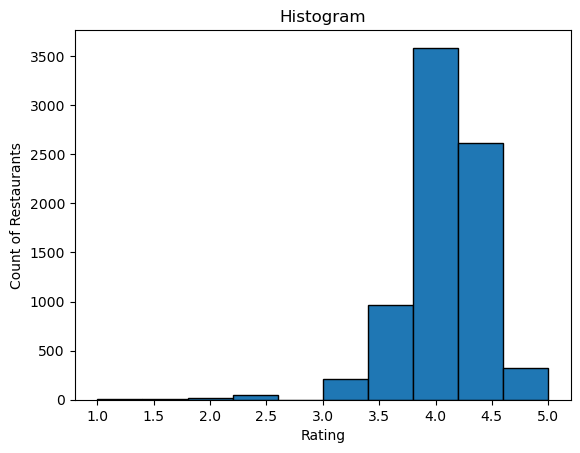

In [16]:
plt.hist(df['rating'], bins=10, edgecolor='black', range=(1, 5))

# Adding labels and title
plt.xlabel('Rating')
plt.ylabel('Count of Restaurants')
plt.title('Histogram')

# Displaying the plot
plt.show()

You can see here that there are not many ratings of restaurants with a score of 1 to 3, so probably the less prediction will result in a score in this range

In [17]:
# Checking how many resturant rating are above 4 and 3.5
print(df[df['rating']>4].shape[0])
print(df[df['rating']>3.5].shape[0])

2942
6527


You can see here the amount of restaurants that are in the range between 3.5-4, most of the restaurants in this score

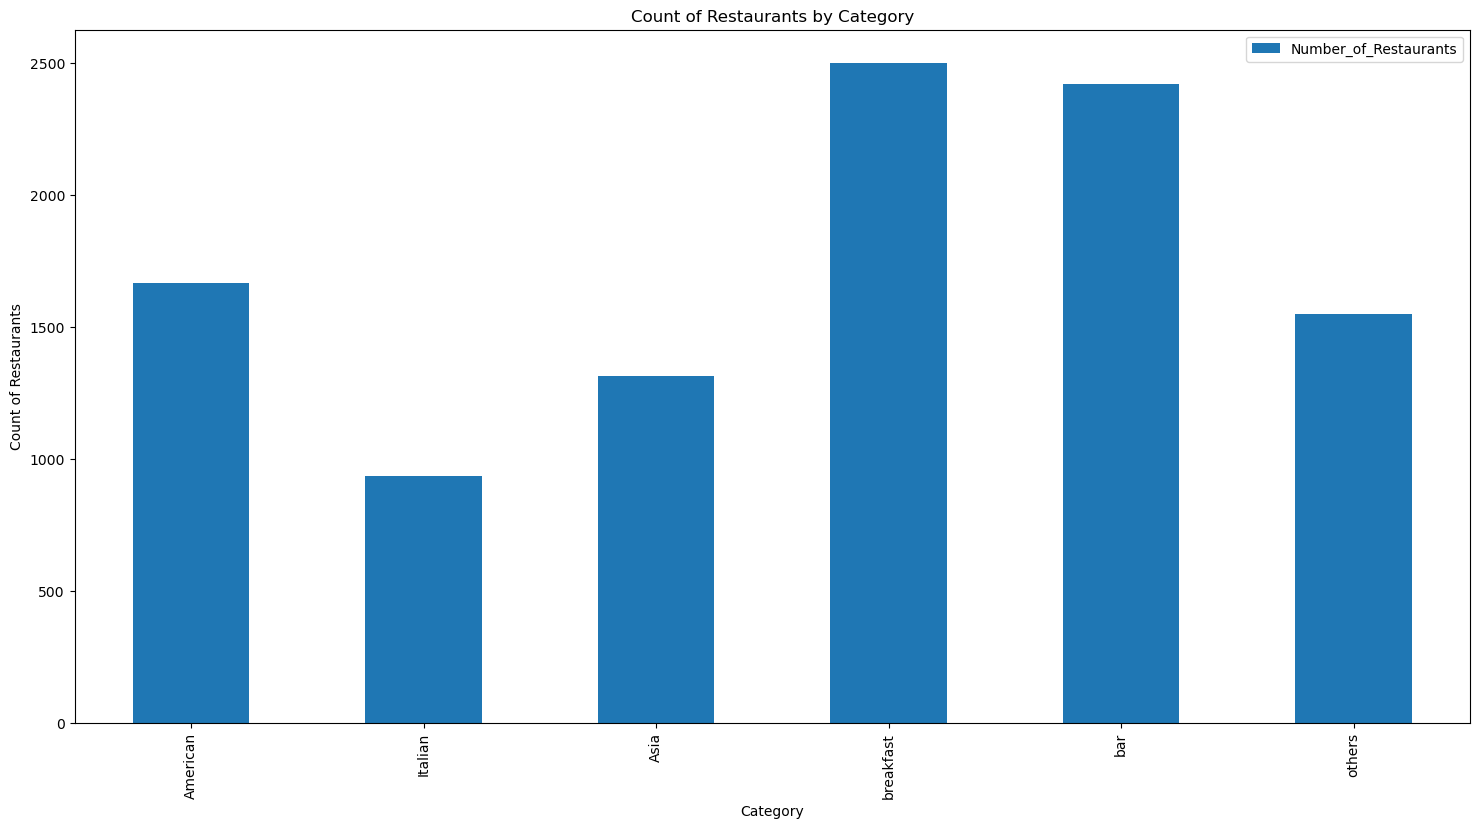

In [18]:
#plotting a graph of how many resturants got what category.
plt.rcParams['figure.figsize'] = (18, 9)
categories = ['American', 'Italian', 'Asia', 'breakfast', 'bar', 'others']
counts = [df[category].sum() for category in categories]
rating_counts = pd.DataFrame({'Category': categories, 'Number_of_Restaurants': counts})
rating_counts.plot(x='Category', y='Number_of_Restaurants', kind='bar')
plt.xlabel('Category')
plt.ylabel('Count of Restaurants')
plt.title('Count of Restaurants by Category')
plt.show()




As you can see there are enough resterautns of each category

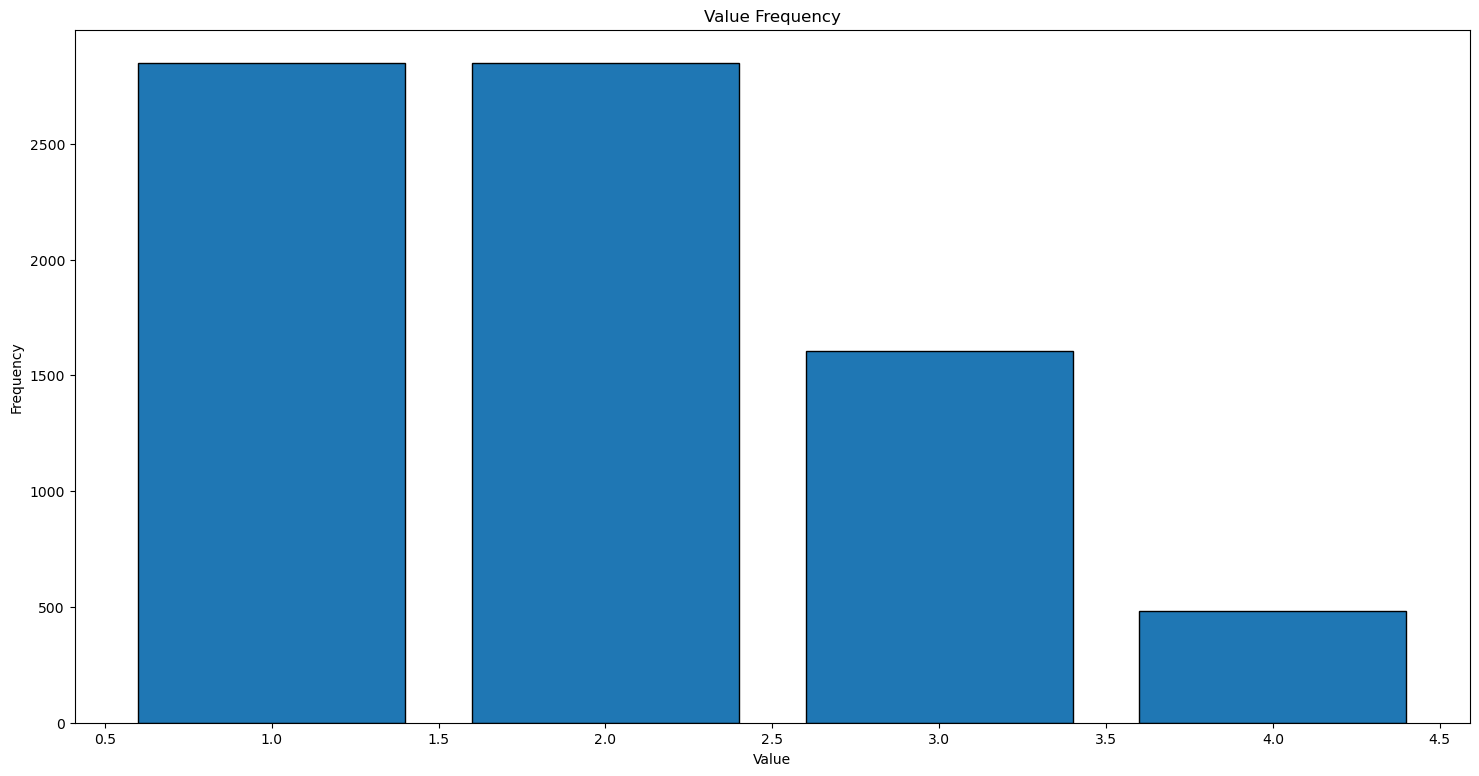

In [19]:
value_counts = df['price_range'].value_counts()

# Get the unique values and their frequencies
values = value_counts.index
frequencies = value_counts.values

# Plotting the bar plot
plt.bar(values, frequencies, edgecolor='black')

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Value Frequency')

# Displaying the plot
plt.show()

The price range is mostly in the range of 1 and 2 but there are stil enough frequencies of the other prices 

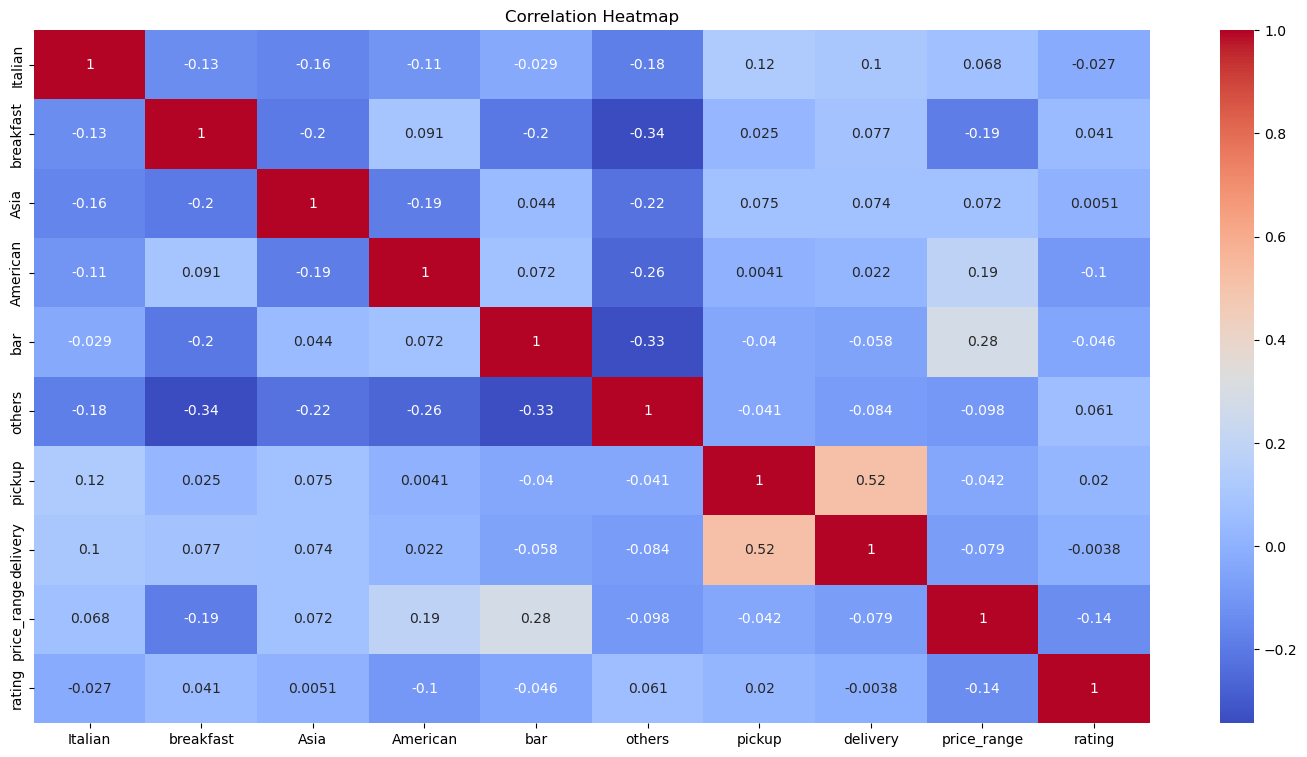

In [20]:
import seaborn as sns
import pandas as pd
import numpy as np

# Calculate correlation matrix from your DataFrame
corr_matrix = df.corr()

# Plotting the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Adding title
plt.title('Correlation Heatmap')

# Displaying the plot
plt.show()

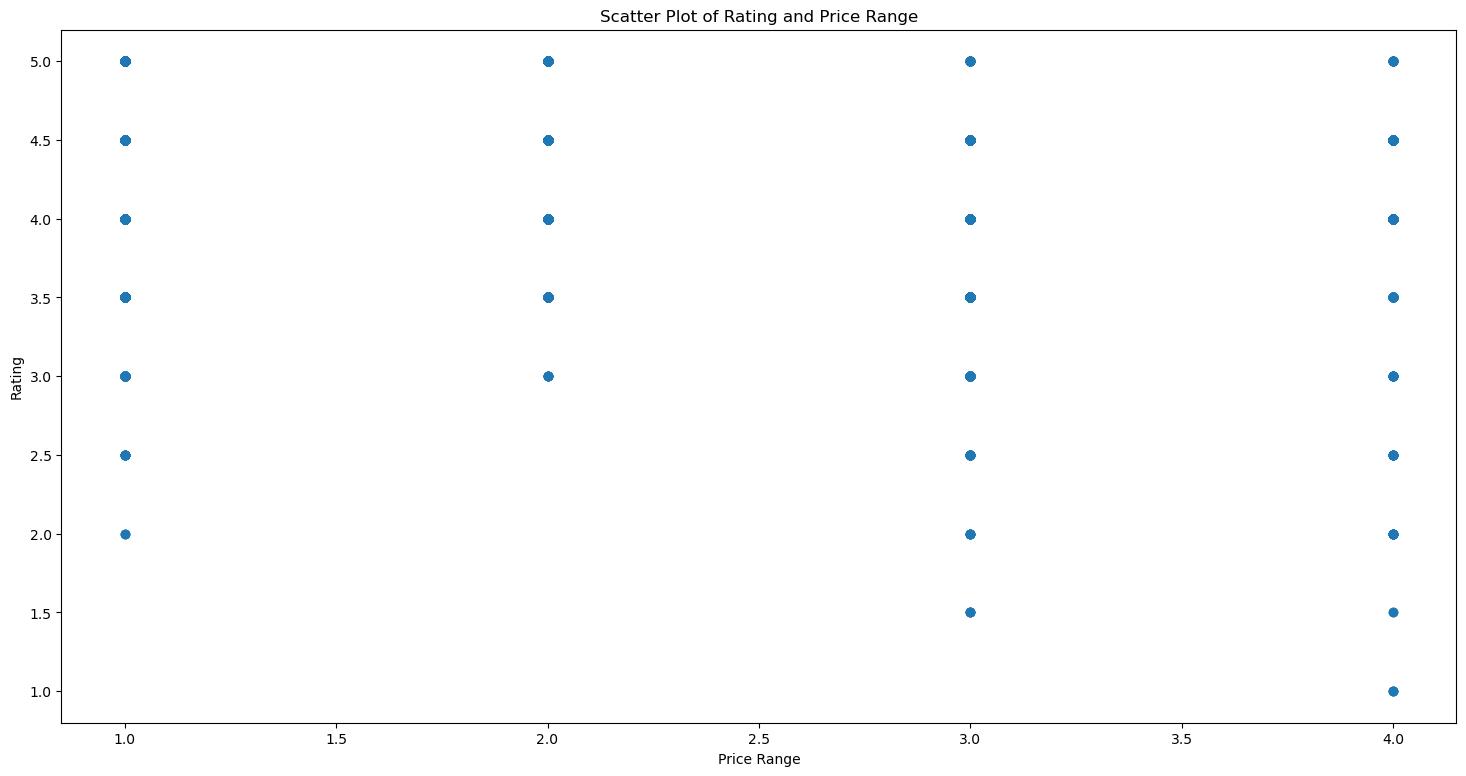

In [21]:
import matplotlib.pyplot as plt

plt.scatter(df['price_range'], df['rating'])

# Adding labels and title
plt.xlabel('Price Range')
plt.ylabel('Rating')
plt.title('Scatter Plot of Rating and Price Range')

# Displaying the plot
plt.show()

The graph indicates that the data is not biased and therefore the model will be able to predict more correctly. For example, if all the expensive restaurants only had a high rating, then as soon as the model had to return, an expensive restaurant would directly say that it was a high rating, which is really not necessarily true

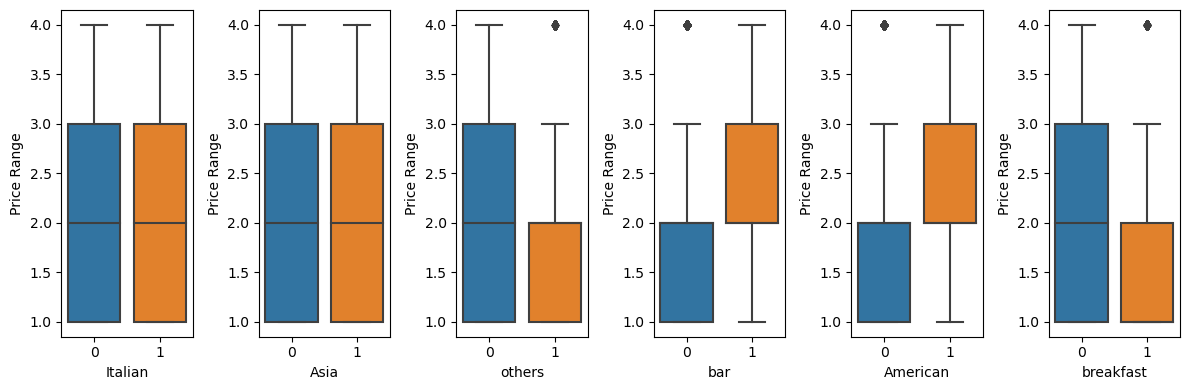

In [22]:
category_cols = ['Italian', 'Asia', 'others', 'bar', 'American', 'breakfast']

# Create subplots for each category
fig, axes = plt.subplots(nrows=1, ncols=len(category_cols), figsize=(12, 4))

# Iterate through each category column
for i, col in enumerate(category_cols):
    # Create a box plot for price_range in each category
    sns.boxplot(data=df, x=col, y='price_range', ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Price Range')

# Adjust spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()

In [23]:
df.head()

,name,Italian,breakfast,Asia,American,bar,others,pickup,delivery,price_range,rating
0,Prince Street Pizza,1,0,0,0,0,0,1,1,1,4.5
1,Best Bagel & Coffee,0,1,0,0,0,0,1,1,1,4.5
2,Los Tacos No.1,0,0,0,0,0,1,0,1,1,4.5
3,L'industrie Pizzeria,1,0,0,0,0,0,0,1,1,4.5
4,Taiyaki NYC,0,0,1,0,0,0,0,1,1,4.5


In [24]:
df.drop('name', axis=1, inplace=True)
df.head()

,Italian,breakfast,Asia,American,bar,others,pickup,delivery,price_range,rating
0,1,0,0,0,0,0,1,1,1,4.5
1,0,1,0,0,0,0,1,1,1,4.5
2,0,0,0,0,0,1,0,1,1,4.5
3,1,0,0,0,0,0,0,1,1,4.5
4,0,0,1,0,0,0,0,1,1,4.5


Dropping the names because they have no effect on the score and therefore are not relevant in prediction either

## The beginning of the models training prediction and scoring

In [25]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the feature matrix X and the target variable y
X = df.iloc[:, :-1]  # Select all columns except the last one as features
y = df.iloc[:, -1]  # Select the last column as the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred) 

# Print the mean squared error
print("Mean Squared Error:", mse)
score = model.score(X_test, y_test)
print("Model Score (R^2):", score)

Mean Squared Error: 0.20194722255080064
Model Score (R^2): 0.025796611256308943


this model is linear regression - explain about linear regression and why linear regression didn't work here. 

### Classificaiton 

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Prepare the feature matrix X and the target variable y
X = df.iloc[:, :-1]  # Select all columns except the last one as features
y = df.iloc[:, -1]  # Select the last column as the target variable

# Convert the continuous rating variable into categorical labels or rating ranges
bins = [0, 1.5, 2.5, 3.5, 4.5, 5]  # Define the bin boundaries
labels = ['1', '1.5', '2', '2.5', '3']  # Define the corresponding labels or rating ranges
y_categorical = pd.cut(y, bins=bins, labels=labels, include_lowest=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logreg_model = LogisticRegression()

# Fit the Logistic Regression model to the training data
logreg_model.fit(X_train, y_train)

# Make predictions using the Logistic Regression model
logreg_predictions = logreg_model.predict(X_test)

# Evaluate the performance of the Logistic Regression model using accuracy score
accuracy = accuracy_score(y_test, logreg_predictions)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 0.7996146435452793


this is logistic regression - explain a bit about it and why it worked better 

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Prepare the feature matrix X and the target variable y
X = df.iloc[:, :-1]  # Select all columns except the last one as features
y = df.iloc[:, -1]  # Select the last column as the target variable

# Convert the continuous rating variable into categorical labels or rating ranges
bins = [0, 1.5, 2.5, 3.5, 4.5, 5]  # Define the bin boundaries
labels = ['1', '1.5', '2', '2.5', '3']  # Define the corresponding labels or rating ranges
y_categorical = pd.cut(y, bins=bins, labels=labels, include_lowest=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Fit the KNN model to the training data
knn_model.fit(X_train, y_train)

# Make predictions using the KNN model
knn_predictions = knn_model.predict(X_test)

# Evaluate the performance of the KNN model using accuracy score
accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", accuracy)

KNN Accuracy: 0.7675016056518946


this is KNN - explain about it and why it worked better

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

# Convert rating to categorical variable
threshold = 2.5  # Set the threshold to distinguish between low and high ratings
df['rating_category'] = df['rating'].apply(lambda x: 'Low' if x <= threshold else 'High')

# Drop the original rating column
df.drop('rating', axis=1, inplace=True)

# Prepare the feature matrix X and the target variable y
X = df.iloc[:, :-1]  # Select all columns except the last one as features
y = df['rating_category']  # Use the converted rating category as the target variable

# Apply Min-Max scaling to the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Perform cross-validation on the KNN model
knn_cv_scores = cross_val_score(knn_model, X_scaled, y, cv=5)  # Perform 5-fold cross-validation
knn_avg_cv_score = knn_cv_scores.mean()
print("KNN Cross-Validation Scores:", knn_cv_scores)
print("KNN Average Cross-Validation Score:", knn_avg_cv_score)

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Perform cross-validation on the Logistic Regression model
logreg_cv_scores = cross_val_score(logreg_model, X_scaled, y, cv=5)  # Perform 5-fold cross-validation
logreg_avg_cv_score = logreg_cv_scores.mean()
print("Logistic Regression Cross-Validation Scores:", logreg_cv_scores)
print("Logistic Regression Average Cross-Validation Score:", logreg_avg_cv_score)


KNN Cross-Validation Scores: [0.98972383 0.98908157 0.985228   0.98908157 0.98908157]
KNN Average Cross-Validation Score: 0.9884393063583815
Logistic Regression Cross-Validation Scores: [0.98972383 0.98908157 0.98908157 0.98908157 0.98908157]
Logistic Regression Average Cross-Validation Score: 0.9892100192678228


this is both knn and logreg with scaling the data

validate that there is no overfitting

### Confusion matrix

In [29]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for KNN model
knn_confusion_matrix = confusion_matrix(y_test, knn_predictions)
print("KNN Confusion Matrix:")
print(knn_confusion_matrix)

# Confusion matrix for Logistic Regression model
logreg_confusion_matrix = confusion_matrix(y_test, logreg_predictions)
print("Logistic Regression Confusion Matrix:")
print(logreg_confusion_matrix)


KNN Confusion Matrix:
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [   1   96 1439    0    0]
 [   1    6   14    0    0]]
Logistic Regression Confusion Matrix:
[[   0    0    0]
 [1536    0    0]
 [  21    0    0]]


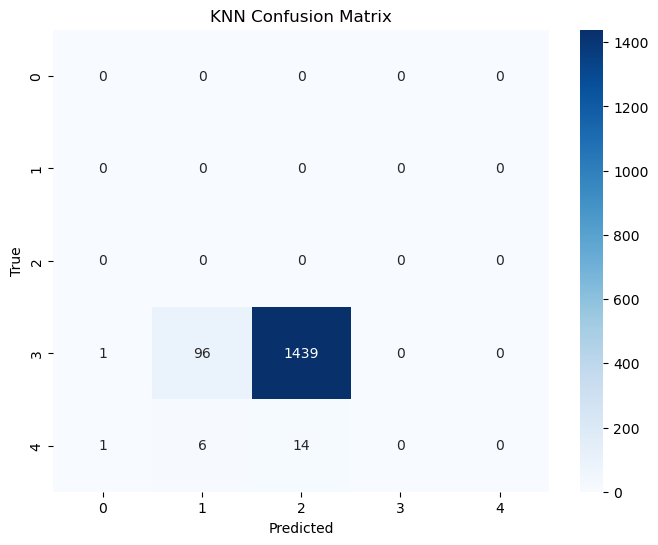

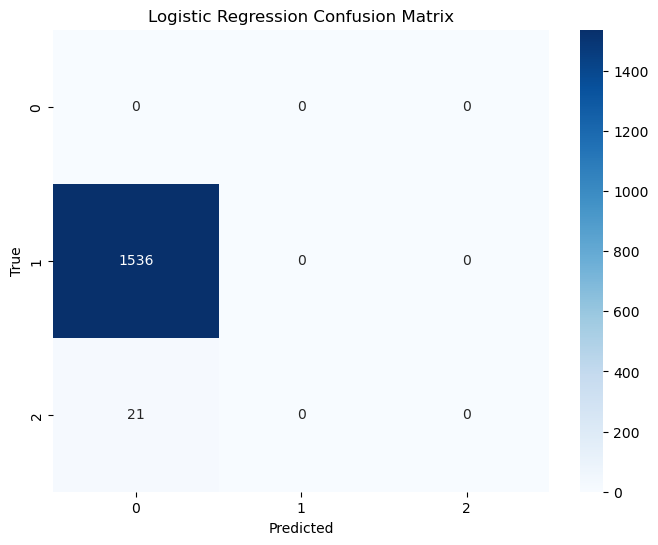

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the KNN Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(knn_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('KNN Confusion Matrix')
plt.show()

# Plotting the Logistic Regression Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(logreg_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


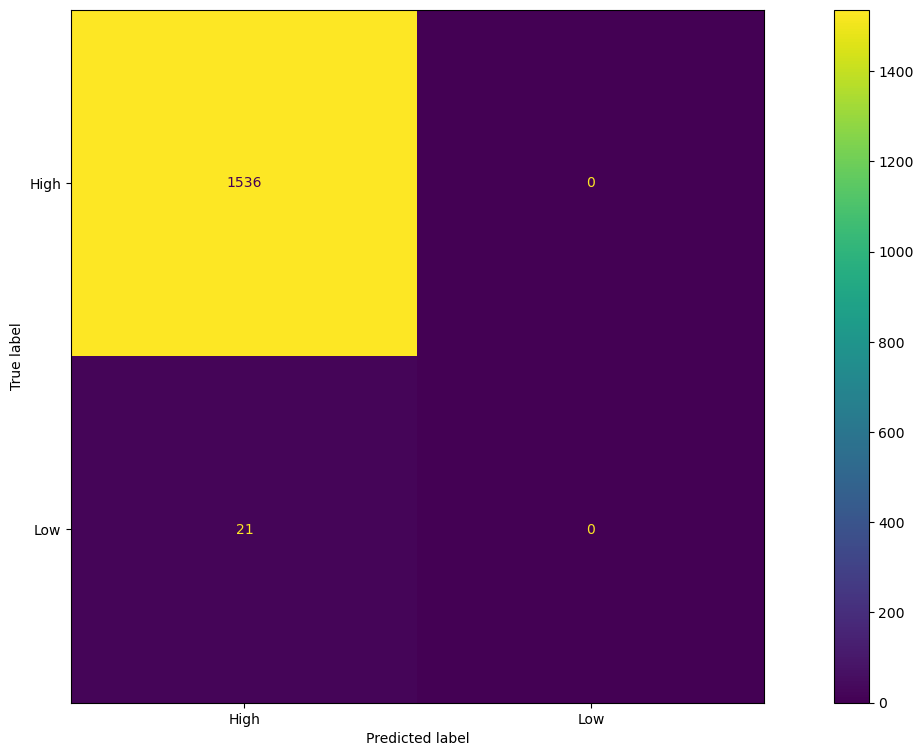

In [31]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix( knn_model, X_test , y_test)

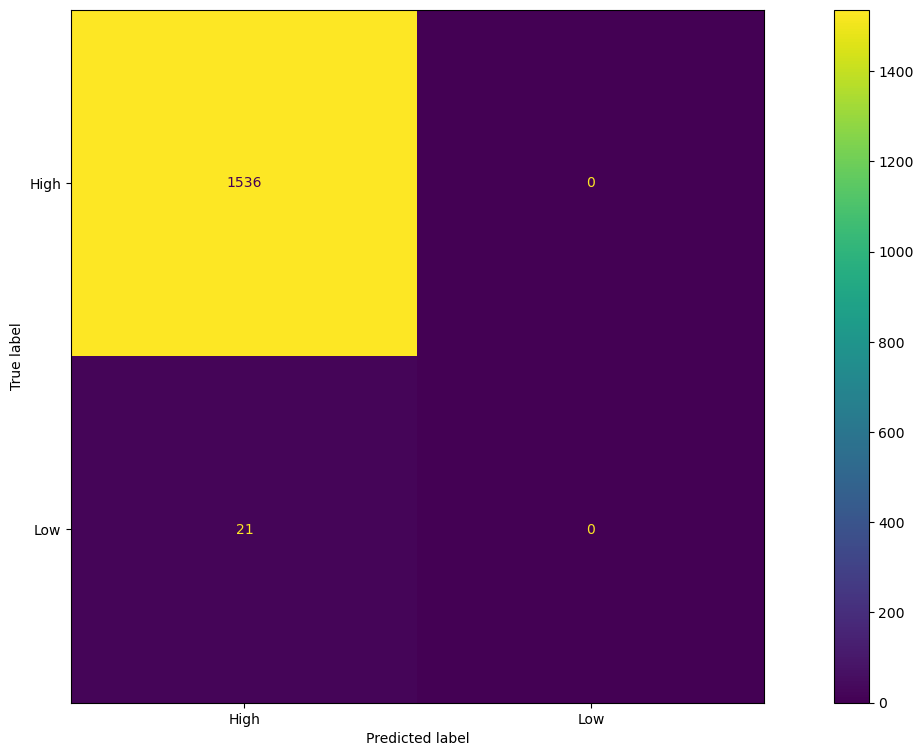

In [32]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg_model, X_test , y_test)

# Conclusion

צריך להיות בדגש שהדאטה התאים יותר לקלאסיפיקציה ולא לרגרסיה לפי מה שחשבת ואפשר לראות את זה בתוצאות